In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBRegressor
from xgboost import plot_tree
from matplotlib.pylab import rcParams
from sklearn.metrics import mean_squared_error
import plotly.express as px

from statsmodels.tsa.seasonal import seasonal_decompose

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from math import *
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.ensemble import BaggingClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report, f1_score,accuracy_score ,confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
import matplotlib.gridspec as gridspec
from sklearn.model_selection import GridSearchCV

In [5]:
stores = pd.read_csv('store.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [6]:
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  31/07/2015   5263        555     1      1            0   
1      2          5  31/07/2015   6064        625     1      1            0   
2      3          5  31/07/2015   8314        821     1      1            0   
3      4          5  31/07/2015  13995       1498     1      1            0   
4      5          5  31/07/2015   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

In [7]:
train.shape #shape of dataset

(1017209, 9)

In [8]:
train['Store'].nunique()

1115

In [9]:
train['DayOfWeek'].unique()

array([5, 4, 3, 2, 1, 7, 6], dtype=int64)

In [10]:
train['Sales'].describe()

count    1.017209e+06
mean     5.773819e+03
std      3.849926e+03
min      0.000000e+00
25%      3.727000e+03
50%      5.744000e+03
75%      7.856000e+03
max      4.155100e+04
Name: Sales, dtype: float64

In [11]:
train['Open'].unique()

array([1, 0], dtype=int64)

In [12]:
train['Promo'].unique()

array([1, 0], dtype=int64)

In [13]:
train['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [14]:
train['SchoolHoliday'].unique()

array([1, 0], dtype=int64)

In [15]:
train['Promo'].unique()

array([1, 0], dtype=int64)

In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Store          41088 non-null  int64  
 1   DayOfWeek      41088 non-null  int64  
 2   Date           41088 non-null  object 
 3   Sales          0 non-null      float64
 4   Customers      0 non-null      float64
 5   Open           41077 non-null  float64
 6   Promo          41088 non-null  int64  
 7   StateHoliday   41088 non-null  object 
 8   SchoolHoliday  41088 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 2.8+ MB


In [17]:
test.shape #shape of test dataset

(41088, 9)

In [18]:
test

Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
0          1          4  17/09/2015    NaN        NaN   1.0      1   
1          3          4  17/09/2015    NaN        NaN   1.0      1   
2          7          4  17/09/2015    NaN        NaN   1.0      1   
3          8          4  17/09/2015    NaN        NaN   1.0      1   
4          9          4  17/09/2015    NaN        NaN   1.0      1   
...      ...        ...         ...    ...        ...   ...    ...   
41083   1111          6  01/08/2015    NaN        NaN   1.0      0   
41084   1112          6  01/08/2015    NaN        NaN   1.0      0   
41085   1113          6  01/08/2015    NaN        NaN   1.0      0   
41086   1114          6  01/08/2015    NaN        NaN   1.0      0   
41087   1115          6  01/08/2015    NaN        NaN   1.0      0   

      StateHoliday  SchoolHoliday  
0                0              0  
1                0              0  
2                0              0  
3                0              0  
4                0              0  
...            ...            ...  
41083            0              0  
41084            0              0  
41085            0              0  
41086            0              0  
41087            0              1  

[41088 rows x 9 columns]

In [19]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [20]:
stores.head()

Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,Jul,Oct  
3              NaN  
4              NaN

In [21]:
stores.shape #shape of stores dataset

(1115, 10)

In [22]:
stores['StoreType'].unique()

array(['c', 'a', 'd', 'b'], dtype=object)

In [23]:
stores['Assortment'].unique()

array(['a', 'c', 'b'], dtype=object)

In [24]:
stores['CompetitionDistance'].unique()

array([1.270e+03, 5.700e+02, 1.413e+04, 6.200e+02, 2.991e+04, 3.100e+02,
       2.400e+04, 7.520e+03, 2.030e+03, 3.160e+03, 9.600e+02, 1.070e+03,
       1.300e+03, 4.110e+03, 3.270e+03, 5.000e+01, 1.384e+04, 3.240e+03,
       2.340e+03, 5.500e+02, 1.040e+03, 4.060e+03, 4.590e+03, 4.300e+02,
       2.300e+03, 6.000e+01, 1.200e+03, 2.170e+03, 4.000e+01, 9.800e+03,
       2.910e+03, 1.320e+03, 2.240e+03, 7.660e+03, 5.400e+02, 4.230e+03,
       1.090e+03, 2.600e+02, 1.800e+02, 1.180e+03, 2.900e+02, 4.880e+03,
       9.710e+03, 2.700e+02, 1.060e+03, 1.801e+04, 6.260e+03, 1.057e+04,
       4.500e+02, 3.036e+04, 7.170e+03, 7.200e+02, 6.620e+03, 4.200e+02,
       7.340e+03, 2.840e+03, 5.540e+03, 3.500e+02, 2.050e+03, 3.700e+03,
       2.256e+04, 4.100e+02, 2.500e+02, 1.130e+03, 4.840e+03, 1.750e+04,
       2.200e+03, 1.650e+03, 3.300e+02, 2.244e+04, 1.996e+04, 3.510e+03,
       3.320e+03, 7.910e+03, 2.370e+03, 2.239e+04, 2.710e+03, 1.181e+04,
       1.870e+03, 4.800e+02, 5.600e+02, 1.069e+04, 

In [25]:
stores['CompetitionOpenSinceMonth'].unique()

array([ 9., 11., 12.,  4., 10.,  8., nan,  3.,  6.,  5.,  1.,  2.,  7.])

In [26]:
stores['CompetitionOpenSinceYear'].unique()

array([2008., 2007., 2006., 2009., 2015., 2013., 2014., 2000., 2011.,
         nan, 2010., 2005., 1999., 2003., 2012., 2004., 2002., 1961.,
       1995., 2001., 1990., 1994., 1900., 1998.])

In [27]:
stores['Promo2'].unique()

array([0, 1], dtype=int64)

In [28]:
stores['Promo2SinceWeek'].unique()

array([nan, 13., 14.,  1., 45., 40., 26., 22.,  5.,  6., 10., 31., 37.,
        9., 39., 27., 18., 35., 23., 48., 36., 50., 44., 49., 28.])

In [29]:
stores['Promo2SinceYear'].unique()

array([  nan, 2010., 2011., 2012., 2009., 2014., 2015., 2013.])

In [30]:
stores['PromoInterval'].unique()

array([nan, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

#Handling Missing Values

In [31]:
train.isnull().sum() #checking for null values

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [32]:
test.isnull().sum()

Store                0
DayOfWeek            0
Date                 0
Sales            41088
Customers        41088
Open                11
Promo                0
StateHoliday         0
SchoolHoliday        0
dtype: int64

In [33]:
stores.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

Out of 1115 entries there are missing values for the columns:

**CompetitionDistance-** distance in meters to the nearest competitor store, the distribution plot would give us an idea about the distances at which generally the stores are opened and we would impute the values accordingly.

**CompetitionOpenSinceMonth**- gives the approximate month of the time the nearest competitor was opened, mode of the column would tell us the most occuring month

**CompetitionOpenSinceYear**- gives the approximate year of the time the nearest competitor was opened, mode of the column would tell us the most occuring month

Promo2SinceWeek, Promo2SinceYear and PromoInterval are NaN wherever Promo2 is 0 or False as can be seen in the first look of the dataset. They can be replaced with 0.

Let's check the skewness

**Competition Distance**

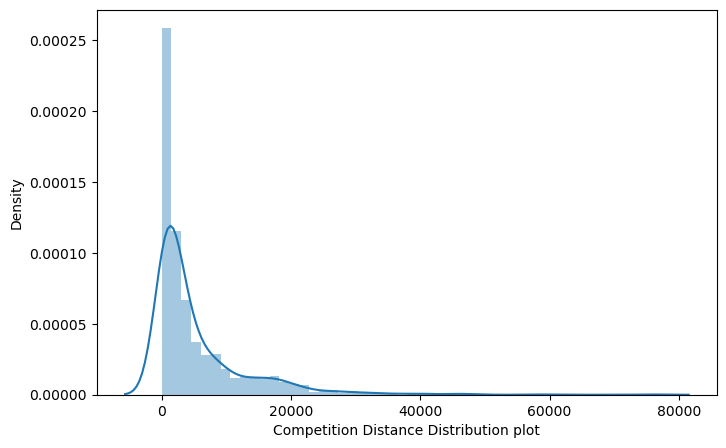

In [34]:
plt.figure(figsize=(8,5))
sns.distplot(x=stores['CompetitionDistance'],hist=True)
plt.xlabel('Competition Distance Distribution plot')
plt.show()

It seems like the data for competetion distance is right skewed. Therefore inputting median is the right choice.

In [35]:
#replacing competition distance with the median value
stores['CompetitionDistance'].fillna(stores['CompetitionDistance'].median(),inplace=True)

**CompetitionOpenSinceMonth**

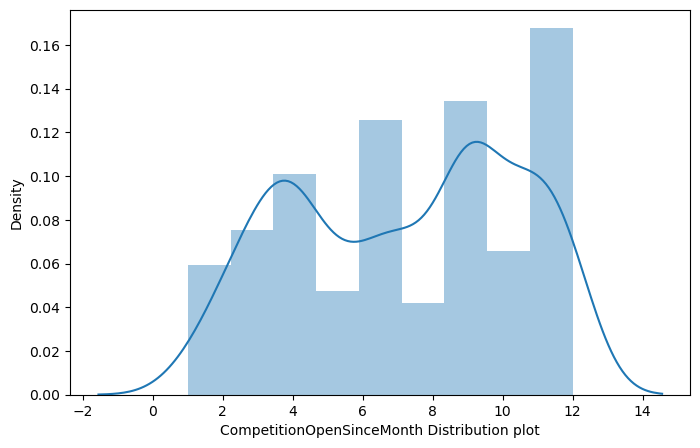

-0.17075013215341991

In [36]:
plt.figure(figsize=(8,5))
sns.distplot(x=stores['CompetitionOpenSinceMonth'],hist=True)
plt.xlabel('CompetitionOpenSinceMonth Distribution plot')
plt.show()

stores['CompetitionOpenSinceMonth'].skew()

In [37]:
# filling competition open since month and year with the most occuring values of the columns i.e modes of those columns
stores['CompetitionOpenSinceMonth'].fillna(stores['CompetitionOpenSinceMonth'].mode()[0],inplace=True)

CompetitionOpenSinceYear

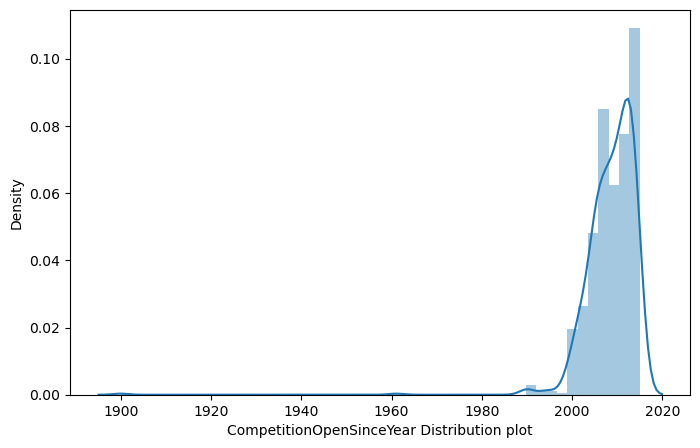

-8.013061944431684

In [38]:
plt.figure(figsize=(8,5))
sns.distplot(x=stores['CompetitionOpenSinceYear'],hist=True)
plt.xlabel('CompetitionOpenSinceYear Distribution plot')
plt.show()

stores['CompetitionOpenSinceYear'].skew()

It seems like the data for competition distance is left skewed. Therefore inputting mode is the right choice.

In [39]:
# filling competition open since year with the most occuring values of the columns i.e mode of those columns
stores['CompetitionOpenSinceYear'].fillna(stores['CompetitionOpenSinceYear'].mode()[0], inplace = True)

In [40]:
# imputing the nan values of promo2 related columns with 0. These variables are type of MNAR(Missing Not At Random).
stores['Promo2SinceWeek'].fillna(value=0,inplace=True)
stores['Promo2SinceYear'].fillna(value=0,inplace=True)
stores['PromoInterval'].fillna(value=0,inplace=True)

In [41]:
#null check
stores.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

#**Data Linkage**

In [42]:
train_merged = train.merge(right=stores, on="Store",how="left")

In [43]:
test_merged = test.merge(right=stores,on="Store",how="left")

In [44]:
train_merged.tail()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
1017204   1111          2  01/01/2013      0          0     0      0   
1017205   1112          2  01/01/2013      0          0     0      0   
1017206   1113          2  01/01/2013      0          0     0      0   
1017207   1114          2  01/01/2013      0          0     0      0   
1017208   1115          2  01/01/2013      0          0     0      0   

        StateHoliday  SchoolHoliday StoreType Assortment  CompetitionDistance  \
1017204            a              1         a          a               1900.0   
1017205            a              1         c          c               1880.0   
1017206            a              1         a          c               9260.0   
1017207            a              1         a          c                870.0   
1017208            a              1         d          c               5350.0   

         CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
1017204                        6.0                    2014.0       1   
1017205                        4.0                    2006.0       0   
1017206                        9.0                    2013.0       0   
1017207                        9.0                    2013.0       0   
1017208                        9.0                    2013.0       1   

         Promo2SinceWeek  Promo2SinceYear     PromoInterval  
1017204             31.0           2013.0   Jan,Apr,Jul,Oct  
1017205              0.0              0.0                 0  
1017206              0.0              0.0                 0  
1017207              0.0              0.0                 0  
1017208             22.0           2012.0  Mar,Jun,Sept,Dec

In [45]:
test_merged.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          4  17/09/2015    NaN        NaN   1.0      1            0   
1      3          4  17/09/2015    NaN        NaN   1.0      1            0   
2      7          4  17/09/2015    NaN        NaN   1.0      1            0   
3      8          4  17/09/2015    NaN        NaN   1.0      1            0   
4      9          4  17/09/2015    NaN        NaN   1.0      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              0         c          a               1270.0   
1              0         a          a              14130.0   
2              0         a          c              24000.0   
3              0         a          a               7520.0   
4              0         a          c               2030.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                       12.0                    2006.0       1   
2                        4.0                    2013.0       0   
3                       10.0                    2014.0       0   
4                        8.0                    2000.0       0   

   Promo2SinceWeek  Promo2SinceYear    PromoInterval  
0              0.0              0.0                0  
1             14.0           2011.0  Jan,Apr,Jul,Oct  
2              0.0              0.0                0  
3              0.0              0.0                0  
4              0.0              0.0                0

In [46]:
train_merged['Date'] = pd.to_datetime(train_merged['Date'], errors='coerce')

In [47]:
train_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

#Let's convet date column and extract different parts


In [48]:
def split_date(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['Day_Name'] = df.Date.dt.day_name()
    df['WeekOfYear'] = df.Date.dt.weekofyear

In [49]:
# Now we will use that function to extract the date information from the merged train dataframe
split_date(train_merged)
# Also we will apply that function to extract the date information from the merged test dataframe
split_date(test_merged)

In [50]:
train_merged.head()

Store  DayOfWeek       Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1            0   
1      2          5 2015-07-31   6064        625     1      1            0   
2      3          5 2015-07-31   8314        821     1      1            0   
3      4          5 2015-07-31  13995       1498     1      1            0   
4      5          5 2015-07-31   4822        559     1      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a               1270.0   
1              1         a          a                570.0   
2              1         a          a              14130.0   
3              1         c          c                620.0   
4              1         a          a              29910.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                       11.0                    2007.0       1   
2                       12.0                    2006.0       1   
3                        9.0                    2009.0       0   
4                        4.0                    2015.0       0   

   Promo2SinceWeek  Promo2SinceYear    PromoInterval  Year  Month  Day  \
0              0.0              0.0                0  2015      7   31   
1             13.0           2010.0  Jan,Apr,Jul,Oct  2015      7   31   
2             14.0           2011.0  Jan,Apr,Jul,Oct  2015      7   31   
3              0.0              0.0                0  2015      7   31   
4              0.0              0.0                0  2015      7   31   

  Day_Name  WeekOfYear  
0   Friday          31  
1   Friday          31  
2   Friday          31  
3   Friday          31  
4   Friday          31

#EDA

**1. MEAN SALES (DAY, DAY_NAME, MONTH, YEAR)**

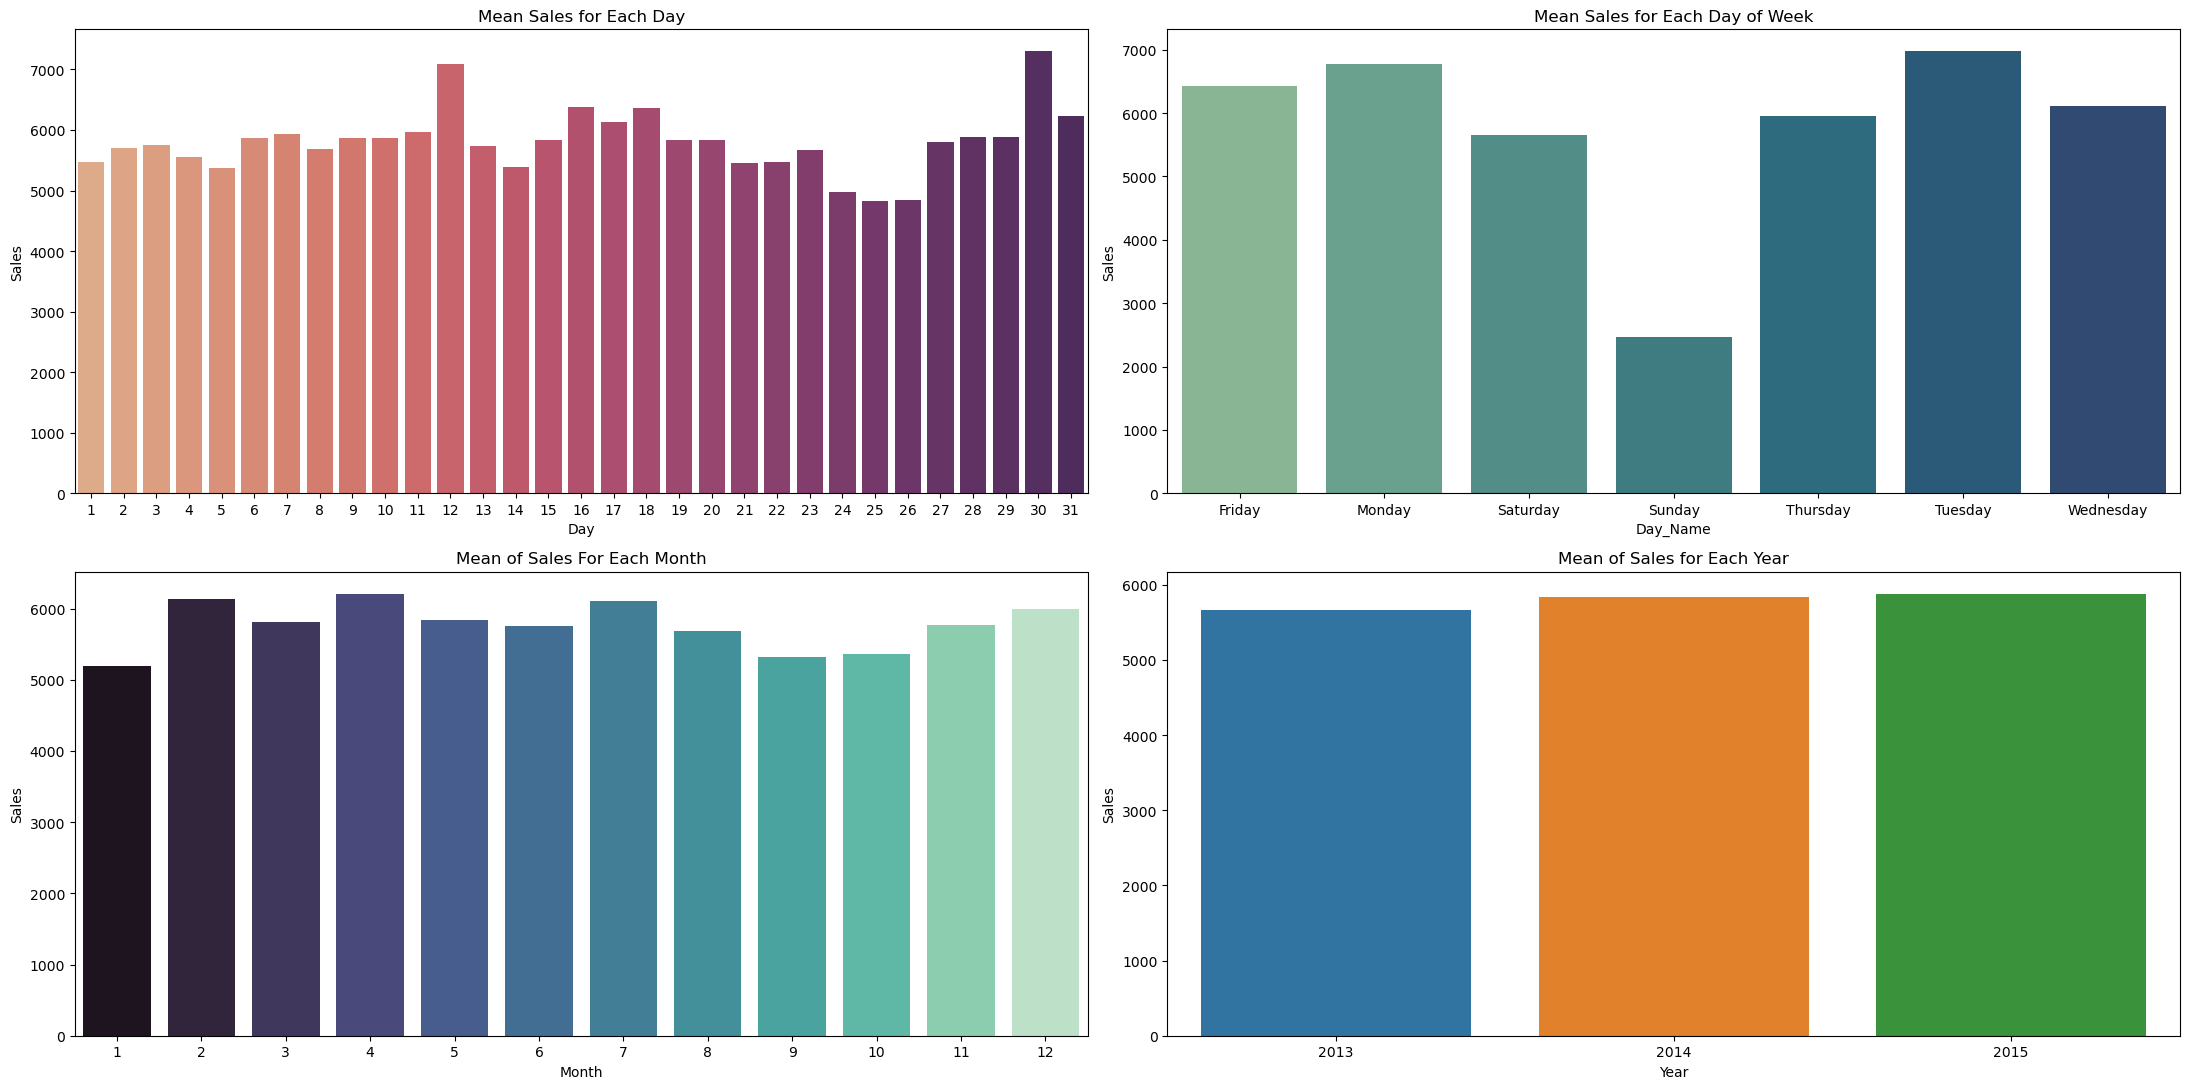

In [51]:
day_df = train_merged.groupby('Day')['Sales'].mean().to_frame().reset_index()
day_name_df = train_merged.groupby('Day_Name')['Sales'].mean().to_frame().reset_index()
month_df = train_merged.groupby('Month')['Sales'].mean().to_frame().reset_index()
year_df = train_merged.groupby('Year')['Sales'].mean().to_frame().reset_index()

fig,ax = plt.subplots(2,2,figsize=(22,11))
ax1 = sns.barplot(x=day_df['Day'],y=day_df['Sales'],ax=ax[0,0],palette="flare")
ax1.set_title("Mean Sales for Each Day")

ax2 = sns.barplot(x=day_name_df['Day_Name'],y=day_name_df['Sales'],ax=ax[0,1],palette="crest")
ax2.set_title("Mean Sales for Each Day of Week")

ax3 = sns.barplot(x=month_df['Month'],y=month_df['Sales'],ax=ax[1,0],palette="mako")
ax3.set_title("Mean of Sales For Each Month")

ax4 = sns.barplot(x=year_df['Year'],y=year_df['Sales'],ax=ax[1,1])
ax4.set_title("Mean of Sales for Each Year")
plt.tight_layout()

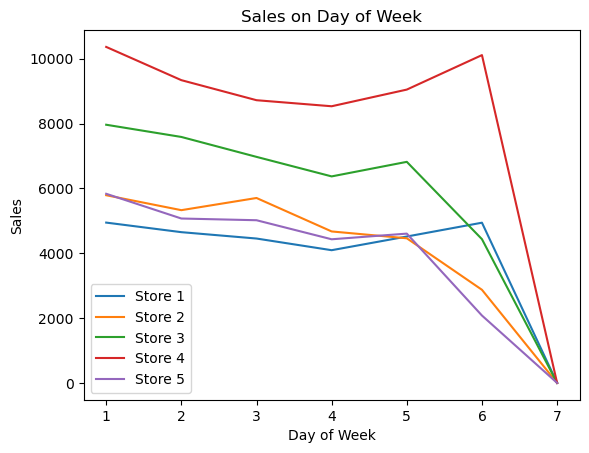

In [52]:
graph=train_merged.groupby(['Store','DayOfWeek'],as_index=False).mean()
for store in train_merged['Store'].unique()[:5]:
    temp=graph[graph['Store']==store]
    plt.plot(temp.DayOfWeek,temp.Sales,label=f"Store {store}")
    plt.legend()
    plt.xlabel('Day of Week')
    plt.ylabel('Sales')
    plt.title('Sales on Day of Week')

**2. DISTRIBUTION OF SALES**

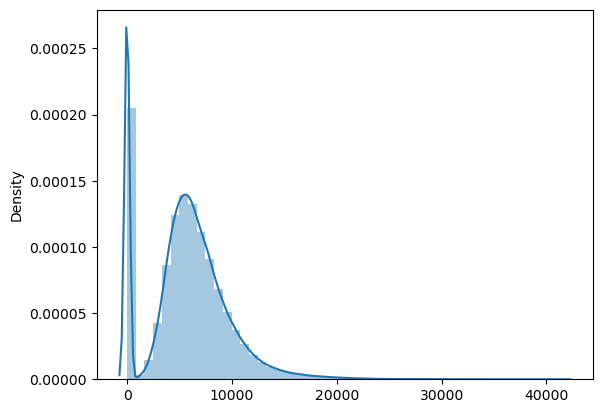

In [53]:
#distribution of sales
sns.distplot(x=train_merged['Sales'])
plt.show()

**3. STORE TYPE AND CUSTOMER V/S SALES**

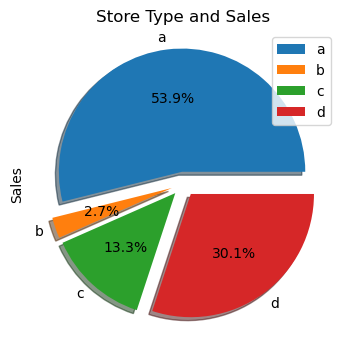

In [54]:
#how store type and customer related to sales
plt.figure(figsize=(4,4))
train_merged.groupby("StoreType")["Sales"].sum().plot.pie(title='Store Type and Sales', legend=True, autopct='%1.1f%%', shadow=True, explode = [0.1, 0.1, 0.1,0.1])
plt.show()


**4. SALES BY STORE**

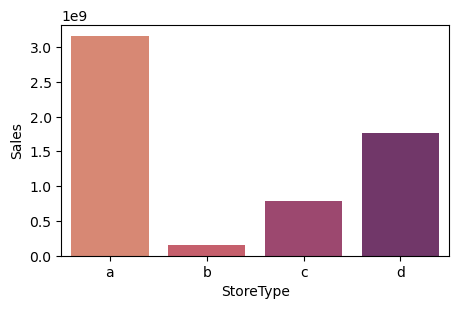

In [55]:
plt.figure(figsize=(5,3))
sales_by_store = train_merged.groupby('StoreType')['Sales'].sum()
sales_by_store = sales_by_store.reset_index()
sns.barplot(data = sales_by_store, x = 'StoreType', y = 'Sales',palette="flare")
plt.show()

we can see that Store of type 'a' and 'd' have the highest total sales.

**5. SALES BY ASSORTMENT TYPE**

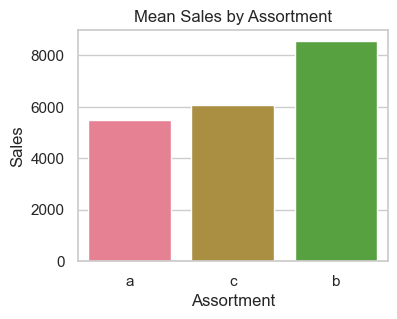

In [56]:
sns.set(style="whitegrid")
colors = sns.color_palette("husl")

# Create the bar plot
plt.figure(figsize=(4, 3))
sns.barplot(x='Assortment', y='Sales', data=train_merged, ci=None, palette=colors)
plt.ylabel('Sales')
plt.title('Mean Sales by Assortment')
plt.show()

**5. CUSTOMERS AND SALES**

<Axes: xlabel='Customers', ylabel='Sales'>

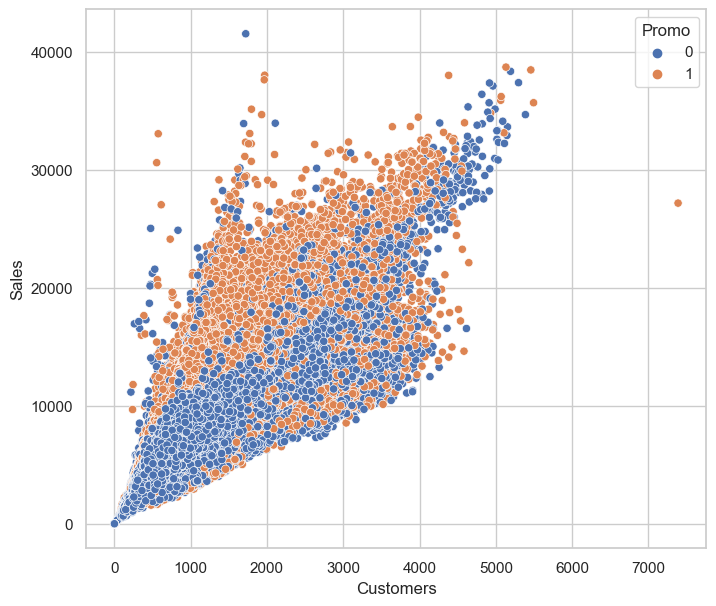

In [57]:
plt.figure(figsize = (8,7))
sns.scatterplot(x=train_merged['Customers'], y=train_merged['Sales'], hue = train_merged['Promo'])

**6. EFFECT OF CUSTOMER AND SALES (STORE TYPE)**

In [58]:
sales_stype = train_merged.groupby('StoreType')['Sales'].mean()
sales_stype =sales_stype.reset_index()
sales_cust = train_merged.groupby('StoreType')['Customers'].mean()
sales_cust = sales_cust.reset_index()

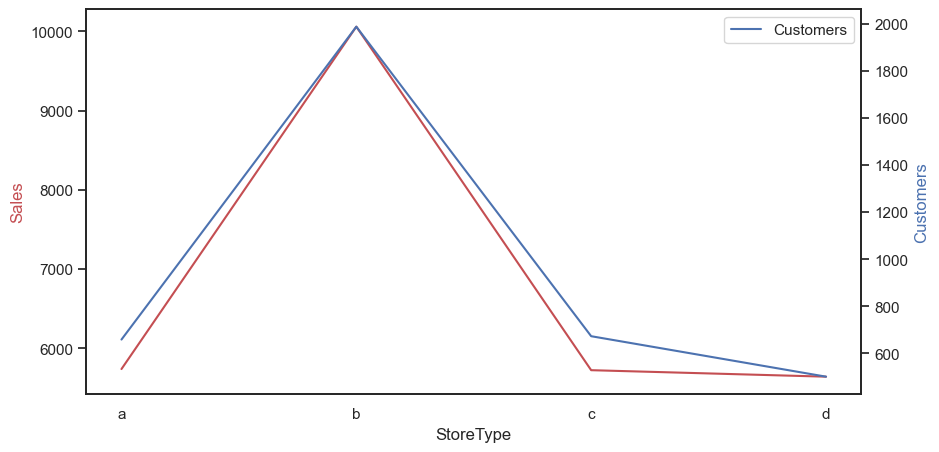

In [59]:
sns.set(style="white")
fig, ax1 = plt.subplots(figsize=(10,5))
ax2 = ax1.twinx()
ax1.plot(sales_stype['StoreType'],sales_stype['Sales'], color = 'r', label = 'Sales')
ax2.plot(sales_cust['StoreType'],sales_cust['Customers'],'b-', label = 'Customers')
ax1.set_xlabel('StoreType')
ax1.set_ylabel('Sales',color = 'r')
ax2.set_ylabel('Customers',color = 'b')
plt.xticks(fontsize=50)
plt.legend()
plt.show()

7.

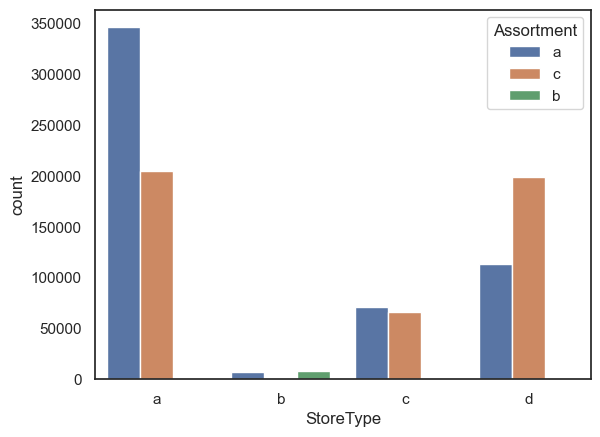

In [60]:
sns.countplot(data = train_merged, x = "StoreType", hue = "Assortment", order=["a","b","c","d"])
plt.show()

So, only store B has all assortment types.

**8. SALES ACROSS PROMO INTERVALS**

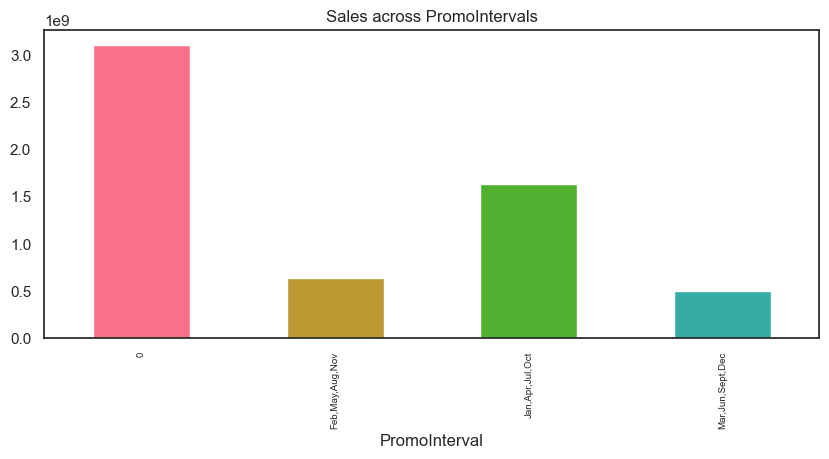

In [61]:
plt.figure(figsize=(10,4))
promo=train_merged.groupby(by=['PromoInterval'])['Sales'].sum()
#Visualizing how sales have varried across various PromoIntervals
colors = sns.color_palette("husl")
promo.plot(kind='bar',title='Sales across PromoIntervals',color=colors)
plt.xticks(fontsize=7)
plt.show()

Highest number sales were observed when 'PROMO2' didn't exist.

Text(0, 0.5, 'Sales')

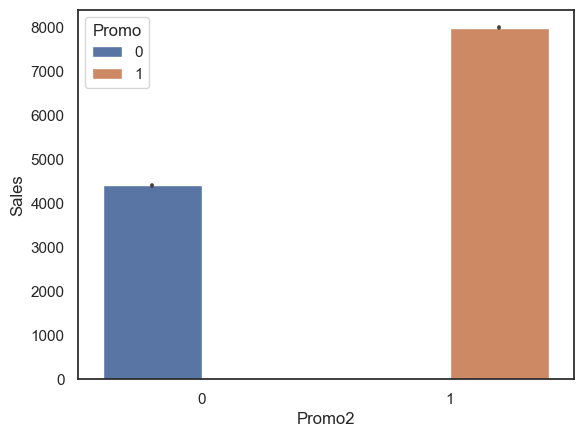

In [62]:
colors = sns.color_palette("husl")
sns.barplot(x=train_merged['Promo'],y=train_merged['Sales'],hue=train_merged['Promo'])
plt.xlabel("Promo2")
plt.ylabel("Sales")

**9. TOTAL SALES ACROSS YEARS**

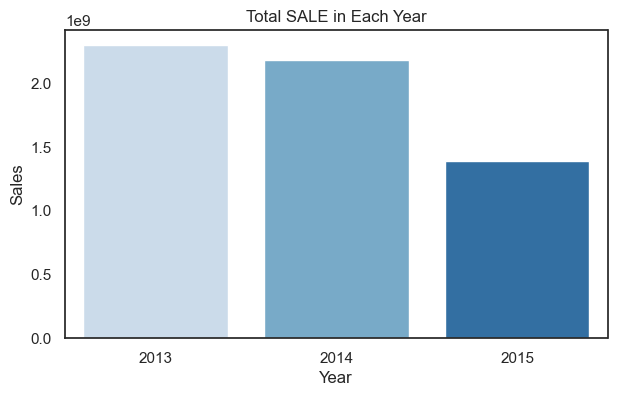

In [63]:
plt.figure(figsize=(7,4))
temp_df = train_merged.groupby(train_merged.Year).sum()
sns.barplot(x=temp_df.index, y=temp_df.Sales, palette='Blues')
plt.title("Total SALE in Each Year")
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()


2013 saw the highest sales while 2015 had the lowest sales.

In [64]:
sales_df_2013 = train_merged[train_merged['Year']== 2013]
sales_df_2014 = train_merged[train_merged['Year']==2014]
sales_df_2015 = train_merged[train_merged['Year']== 2015]

In [65]:
#monthly sales
sales_2013 = sales_df_2013.groupby('Month')['Sales'].sum().reset_index()
sales_2014 = sales_df_2014.groupby('Month')['Sales'].sum().reset_index()
sales_2015 = sales_df_2015.groupby('Month')['Sales'].sum().reset_index()

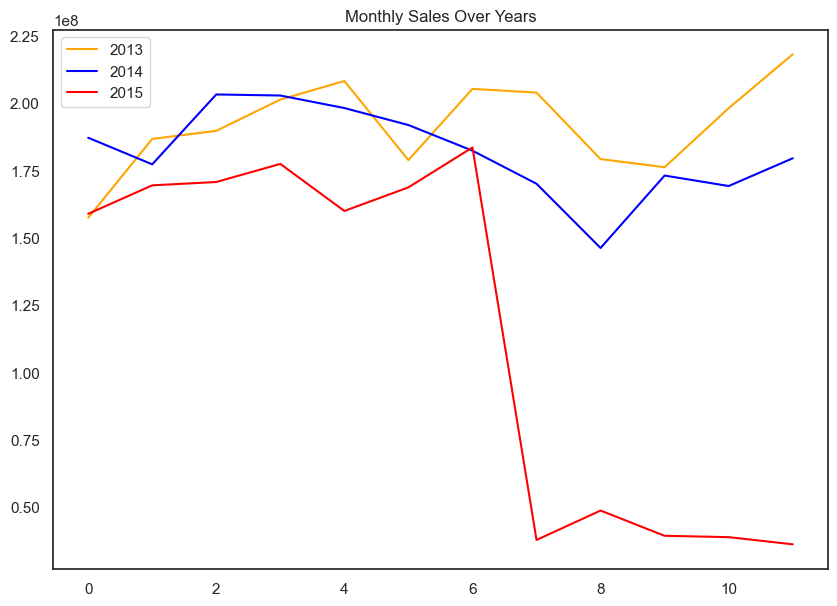

In [66]:
plt.figure(figsize = (10,7))
plt.plot(sales_2013.loc[:,'Sales'],label='2013',color='orange')
plt.plot(sales_2014.loc[:,'Sales'],label='2014',color='blue')
plt.plot(sales_2015.loc[:,'Sales'],label='2015',color='red')
plt.title('Monthly Sales Over Years')
plt.legend()


**10. EFFECT OF HOLIDAYS ON CUSTOMERS**

<Axes: xlabel='StateHoliday'>

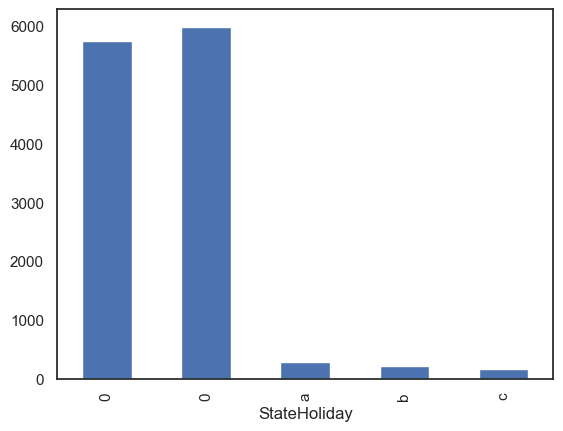

In [67]:
train_merged.groupby('StateHoliday')['Sales'].mean().plot.bar()

In [68]:
#dfso is the dataframe when store is open
dfso= train_merged[train_merged["Open"] != 0]
#dfs1 is the dataframe which includes only those stores that were open on a SchoolHoliday
dfs1= dfso[dfso["SchoolHoliday"] == 1]
#dfs2 is the dataframe which includes only those stores that were open on a StateHoliday
dfs2= dfso[dfso["StateHoliday"]==1]
print(dfs2.shape[0])

#dfs2 is null
#Calculating the total Customers Per who visit the store on a schoolholiday
dfs1=dfs1.groupby(by=['Store'])['Customers'].sum()
#the total number of days the store was open on a schoolholiday
Count=dfs1.shape[0]
#Calculating the Average
AvgCustPerStore=dfs1.sum()/Count
#Average customers per Store if store is open on holidays
print(AvgCustPerStore)
114804
#dfs3 is a dataframe that holds information about the stores that remain closed on a schoolholiday
dfs3=dfso[dfso['SchoolHoliday']!=1]
#calculating the total customers that visit the stores that are closed on schoolholidays
dfs3=dfs3.groupby(by=['Store'])['Customers'].sum()
#calculating the number of days the stores were open
Count2=dfs3.shape[0]
#calculating the average
AvgCustPerStore2=dfs3.sum()/Count2

0
114804.1470852018


462811.77668161434


<Axes: title={'center': 'Average Customers per store on holiday or no holiday'}>

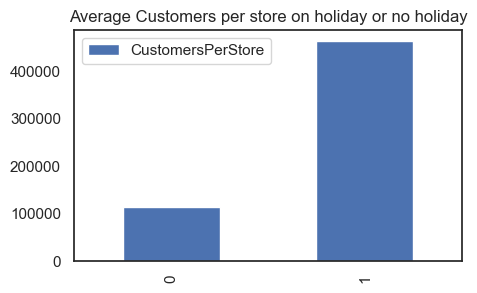

In [69]:
print(AvgCustPerStore2)

#Creating a dataframe to store these 2 averages so that we can display a bar graph for this infromation
ts2=[AvgCustPerStore,AvgCustPerStore2]
cust3=pd.DataFrame(ts2,columns=['CustomersPerStore'])
cust3.plot(kind='bar',title='Average Customers per store on holiday or no holiday',figsize=(5,3))

**11. SALES TREND OVER YEARS**

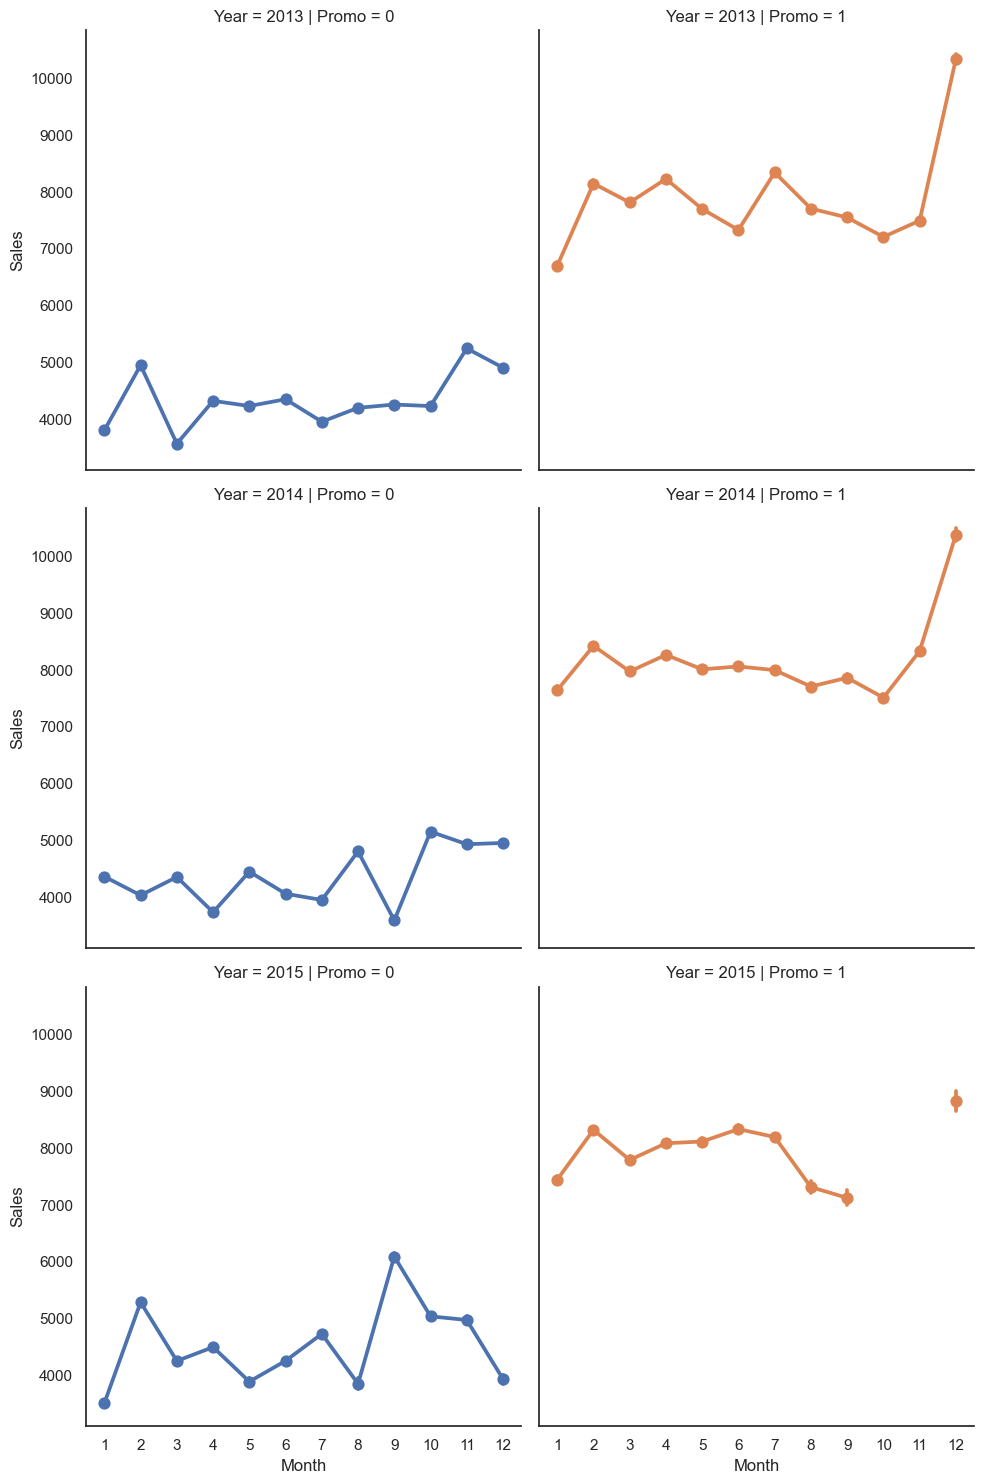

In [70]:
# Sales trend over days
sns.catplot(data = train_merged, x = "Month", y = "Sales", hue = "Promo",kind="point",col="Promo",row="Year");

We can see from the above trends that sales tend to spike in November and December. So, there is a seasonality factor present in the data.

**12. CORRELATION ANALYSIS**

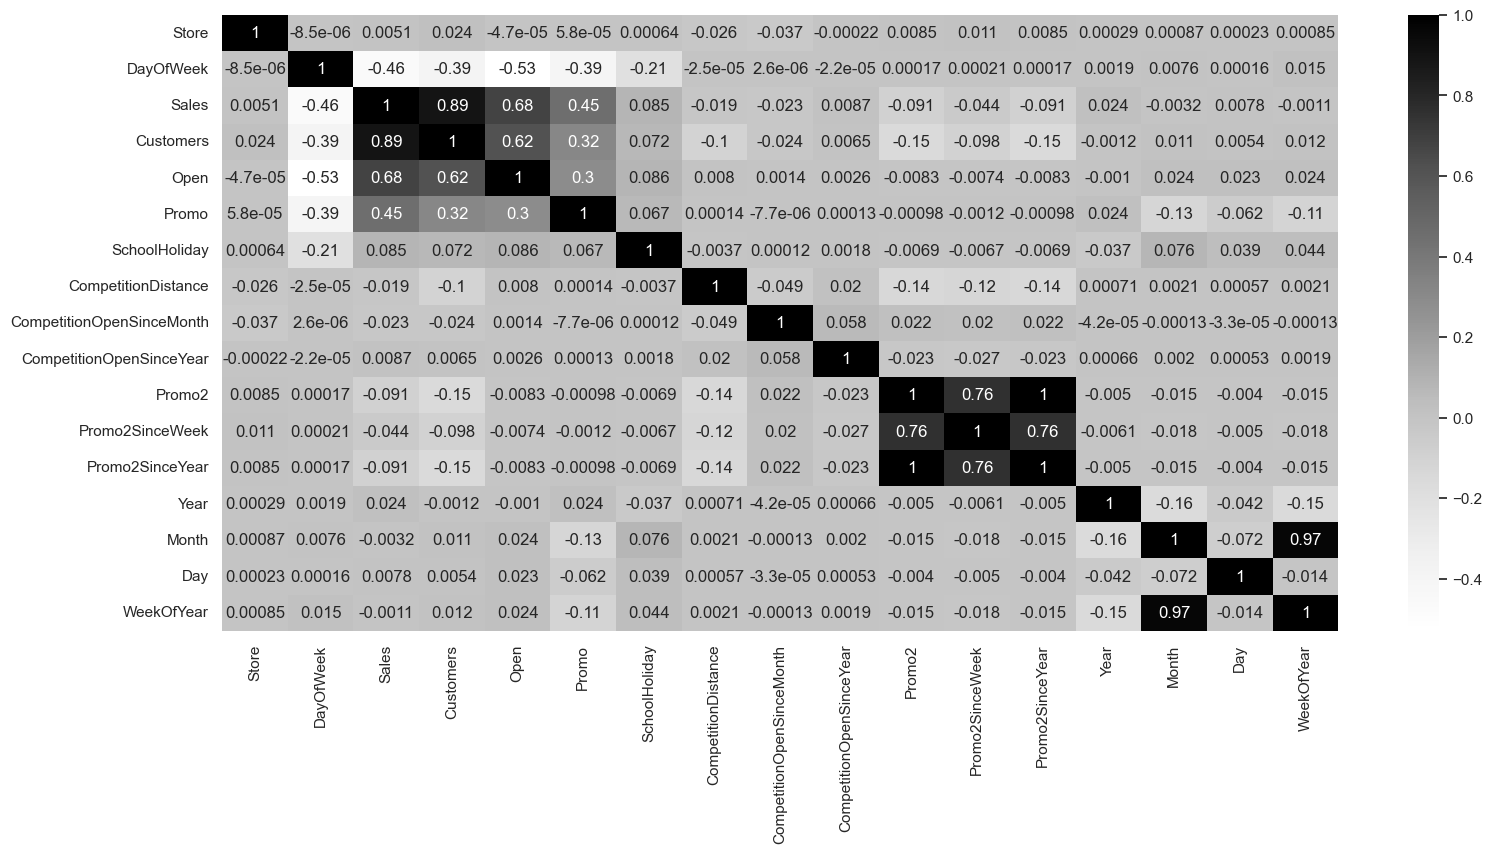

In [71]:
plt.figure(figsize = (18, 8))
sns.heatmap(train_merged.corr(), annot = True, cmap="Greys");

We can see a strong positive correlation between the amount of Sales and Customers visiting the store. We can also observe a positive correlation between a running promotion (Promo = 1) and number of customers.

#13. Effect of Competition Distance on Sales

<Axes: xlabel='CompetitionDistance', ylabel='Sales'>

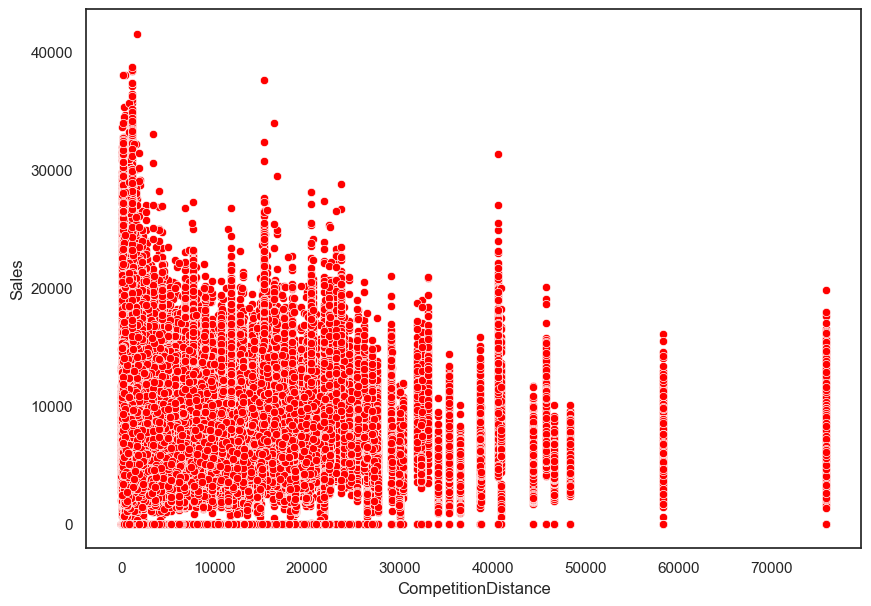

In [72]:
plt.figure(figsize = (10,7))
sns.scatterplot(x=train_merged['CompetitionDistance'], y=train_merged['Sales'], color='red')

#TIME SERIES ANALYSIS


For Time Series Anlaysis , we will consider one store from each store type a , b, c , d that will represent their respective group. It also makes sense to downsample the data from days to weeks using the resample method to see the present trends more clearly.

In [73]:
pd.plotting.register_matplotlib_converters()

In [74]:
train['Date'] = pd.to_datetime(train['Date'])

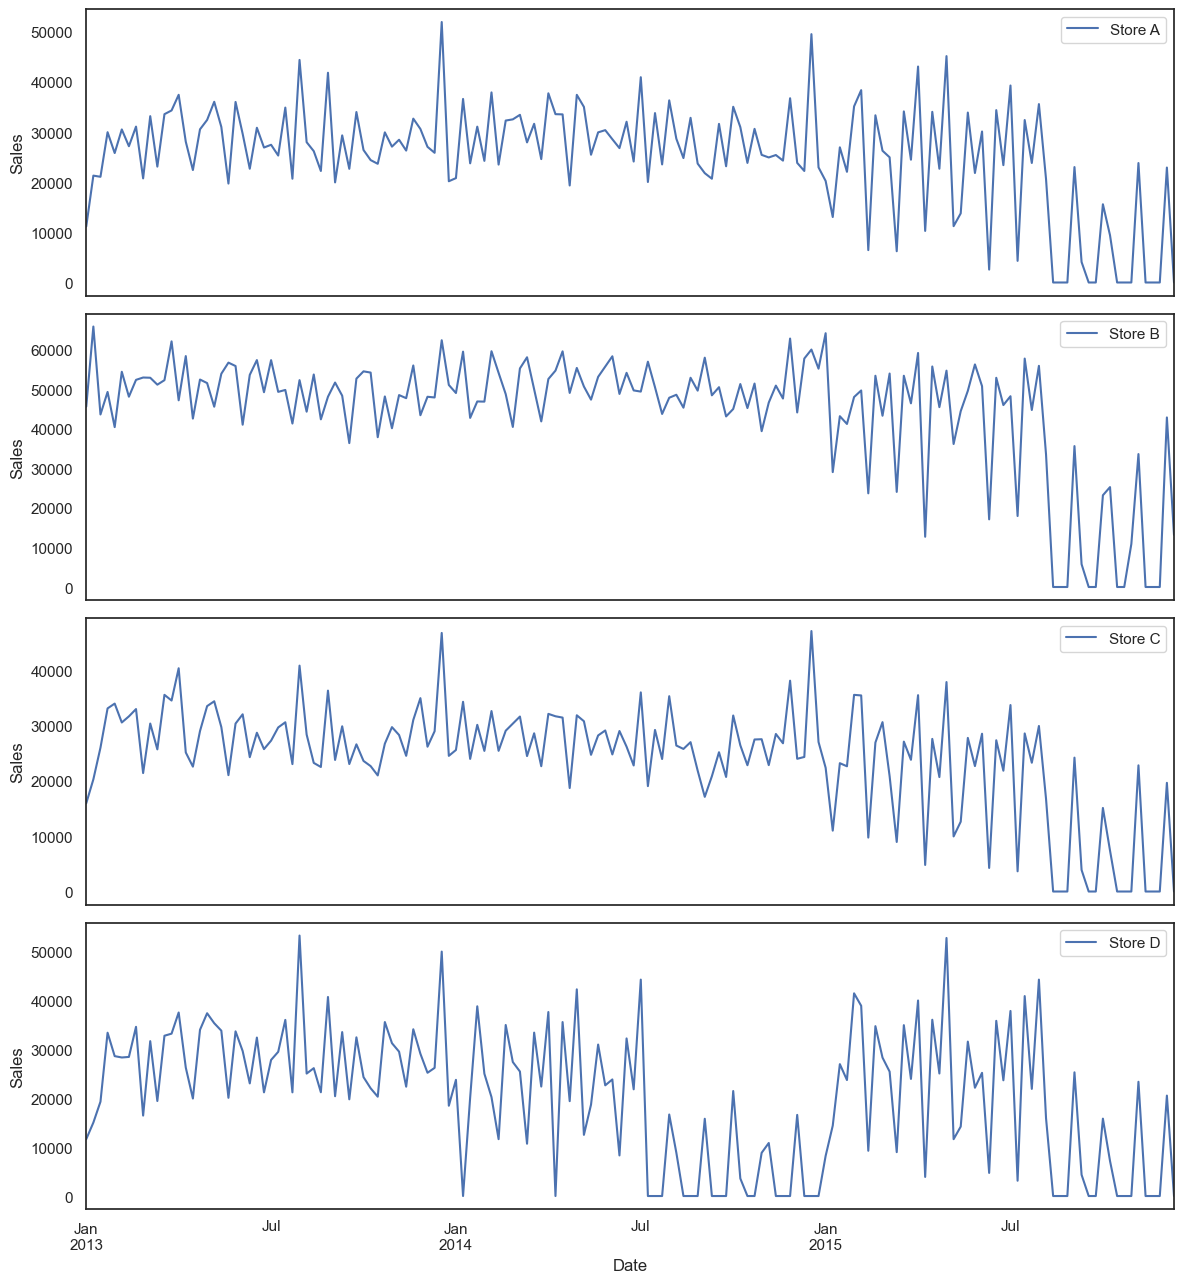

In [75]:
# Data Preparation: input should be float type
train['Sales'] = train['Sales'] * 1.0

# Convert 'Date' column to datetime format
train['Date'] = pd.to_datetime(train['Date'])

# Assigning one store from each category
sales_a = train[train.Store == 2].set_index('Date')['Sales'].sort_index(ascending=True)
sales_b = train[train.Store == 85].set_index('Date')['Sales'].sort_index(ascending=True)
sales_c = train[train.Store == 1].set_index('Date')['Sales'].sort_index(ascending=True)
sales_d = train[train.Store == 13].set_index('Date')['Sales'].sort_index(ascending=True)

# Create subplots
fig, axes = plt.subplots(4, 1, figsize=(12, 13), sharex=True)

# Plot each store's sales trend
sales_a.resample('W').sum().plot(ax=axes[0], label='Store A')
sales_b.resample('W').sum().plot(ax=axes[1], label='Store B')
sales_c.resample('W').sum().plot(ax=axes[2], label='Store C')
sales_d.resample('W').sum().plot(ax=axes[3], label='Store D')

# Set labels and titles
axes[0].set_ylabel('Sales')
axes[1].set_ylabel('Sales')
axes[2].set_ylabel('Sales')
axes[3].set_ylabel('Sales')
axes[3].set_xlabel('Date')

# Adjust layout
plt.tight_layout()

# Add legend
for ax in axes:
    ax.legend()

plt.show()


We can see from above plots that sales for StoreType A and C tend to peak in the end of year (Christmas season) and then decline after the holidays. We are not able to see a similar trend in StoreType D because no data is available for that time period (stores closed).

**CHECK FOR STATIONARITY - Using Dickey Fuller Test**

Dicky -Fuller test: This test provides us the statistical data such as p-value to understand whether we can reject the null hypothesis. The null hypothesis is that data is not stationary and the alternative hypothesis says that data is stationary. If p-value is less than the critical value (say 0.5), we will reject the null hypothesis and say that data is stationary.

In [76]:
# Testing stationarity of store type a
from statsmodels.tsa.stattools import adfuller
# Function to test the stationarity
def test_stationarity(timeseries):

    # Determing rolling statistics
    roll_mean = timeseries.rolling(window=7).mean()
    roll_std = timeseries.rolling(window=7).std()

    #fig, ax = plt.subplots(figsize=figsize)
    # Plotting rolling statistics:
    orig = plt.plot(timeseries.resample('W').mean(), color='blue',label='Original')
    mean = plt.plot(roll_mean.resample('W').mean(), color='red', label='Rolling Mean')
    std = plt.plot(roll_std.resample('W').mean(), color='green', label = 'Rolling Std')
    plt.xticks(rotation=45)
    plt.legend(loc='best')
    plt.show(block=False)

    # Performing Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
           print(key, value)

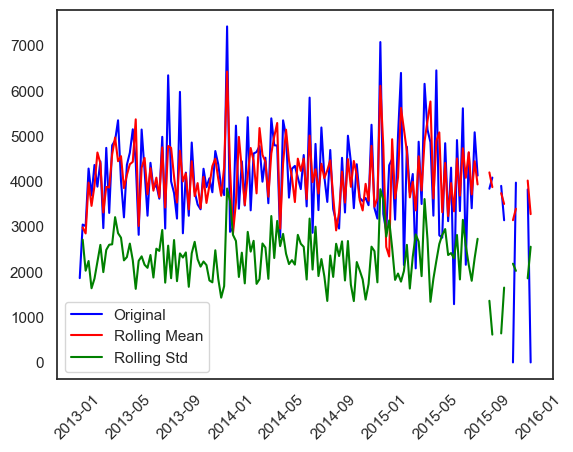

Results of Dickey-Fuller Test:
ADF Statistic: -11.085055
p-value: 0.000000
Critical Values:
1% -3.4374010121538072
5% -2.864652794604883
10% -2.5684274413226964


In [77]:
# Testing stationarity of store type a
test_stationarity(sales_a)

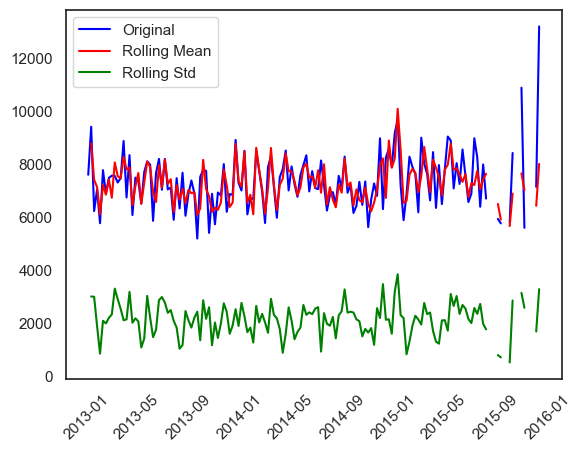

Results of Dickey-Fuller Test:
ADF Statistic: -7.841342
p-value: 0.000000
Critical Values:
1% -3.4374162506455126
5% -2.8646595140022946
10% -2.568431020409111


In [78]:
#Testing stationarity of store type b
test_stationarity(sales_b)

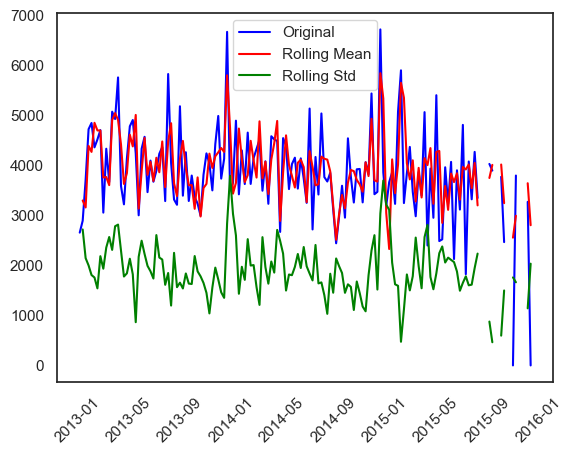

Results of Dickey-Fuller Test:
ADF Statistic: -10.702943
p-value: 0.000000
Critical Values:
1% -3.437363201927513
5% -2.864636122077874
10% -2.5684185607252137


In [79]:
#Testing stationarity of store type b
test_stationarity(sales_c)

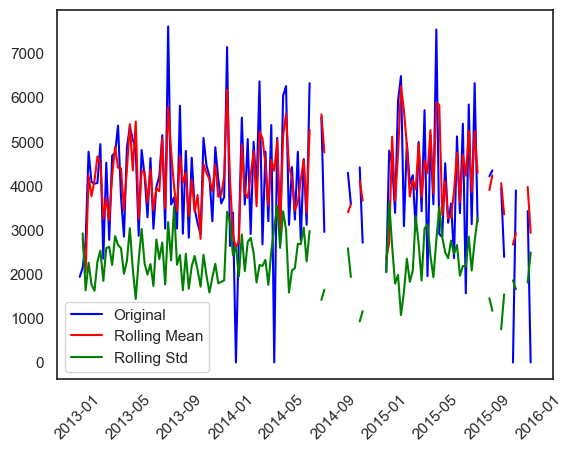

Results of Dickey-Fuller Test:
ADF Statistic: -7.078553
p-value: 0.000000
Critical Values:
1% -3.4392057325732104
5% -2.8654483492874236
10% -2.5688512291811225


In [80]:
#Testing stationarity of store type b
test_stationarity(sales_d)

We can see from the above plots and statistical tests that mean and variation doesn't change much with time, i.e they are constant. Thus, we don't need to perform any transformation (needed when time series is not stationary).

Now, let's check the trend and seasonality in our data.

In [81]:
# Plotting seasonality and trend
def plot_timeseries(sales,StoreType):

    fig, axes = plt.subplots(2, 1, sharex=True, sharey=False)
    fig.set_figheight(5)
    fig.set_figwidth(10)

    decomposition= seasonal_decompose(sales, model = 'additive',period=365)

    estimated_trend = decomposition.trend
    estimated_seasonal = decomposition.seasonal
    estimated_residual = decomposition.resid

    axes[1].plot(estimated_seasonal, 'g', label='Seasonality')
    axes[1].legend(loc='upper left');

    axes[0].plot(estimated_trend, label='Trend')
    axes[0].legend(loc='upper left');

    plt.title('Decomposition Plots')

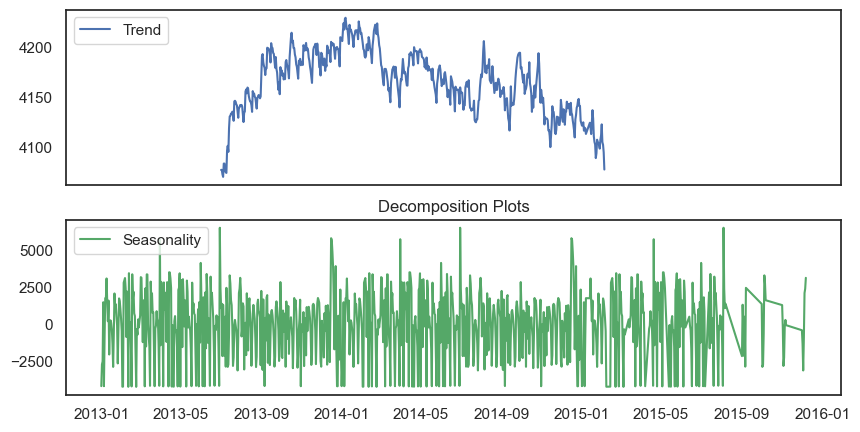

In [82]:
# Plotting seasonality and trend for store type a
plot_timeseries(sales_a,'a')

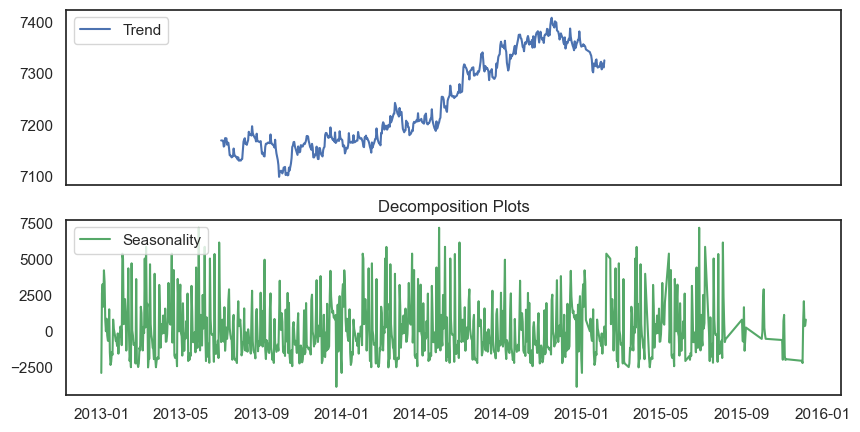

In [83]:
# Plotting seasonality and trend for store type b
plot_timeseries(sales_b,'b')

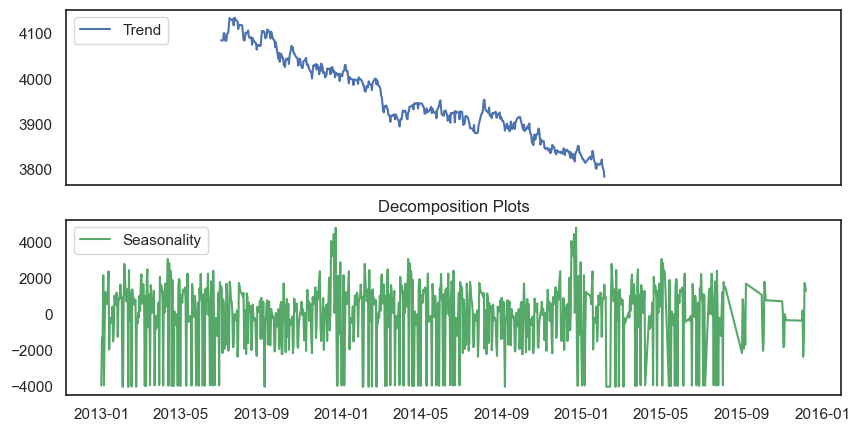

In [84]:
# Plotting seasonality and trend for store type c
plot_timeseries(sales_c,'c')

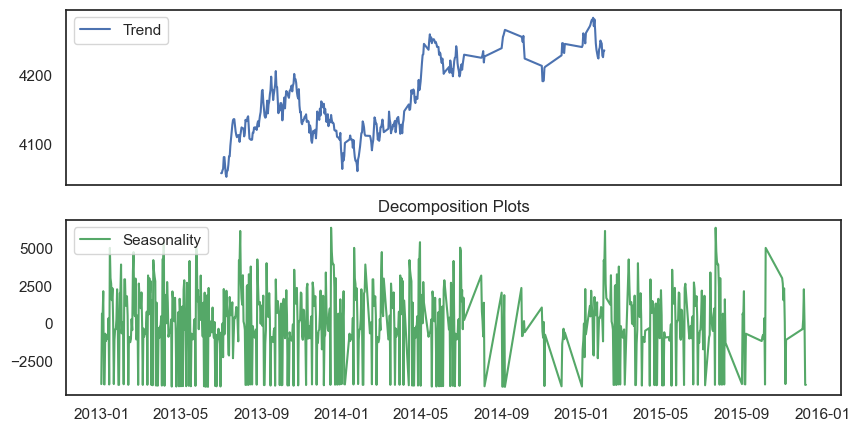

In [85]:
# Plotting seasonality and trend for store type d
plot_timeseries(sales_d,'d')

From the above plots, we can see that there is seasonality and trend present in our data.

In [86]:
train_merged

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
0            1          5 2015-07-31   5263        555     1      1   
1            2          5 2015-07-31   6064        625     1      1   
2            3          5 2015-07-31   8314        821     1      1   
3            4          5 2015-07-31  13995       1498     1      1   
4            5          5 2015-07-31   4822        559     1      1   
...        ...        ...        ...    ...        ...   ...    ...   
1017204   1111          2 2013-01-01      0          0     0      0   
1017205   1112          2 2013-01-01      0          0     0      0   
1017206   1113          2 2013-01-01      0          0     0      0   
1017207   1114          2 2013-01-01      0          0     0      0   
1017208   1115          2 2013-01-01      0          0     0      0   

        StateHoliday  SchoolHoliday StoreType Assortment  CompetitionDistance  \
0                  0              1         c          a               1270.0   
1                  0              1         a          a                570.0   
2                  0              1         a          a              14130.0   
3                  0              1         c          c                620.0   
4                  0              1         a          a              29910.0   
...              ...            ...       ...        ...                  ...   
1017204            a              1         a          a               1900.0   
1017205            a              1         c          c               1880.0   
1017206            a              1         a          c               9260.0   
1017207            a              1         a          c                870.0   
1017208            a              1         d          c               5350.0   

         CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                              9.0                    2008.0       0   
1                             11.0                    2007.0       1   
2                             12.0                    2006.0       1   
3                              9.0                    2009.0       0   
4                              4.0                    2015.0       0   
...                            ...                       ...     ...   
1017204                        6.0                    2014.0       1   
1017205                        4.0                    2006.0       0   
1017206                        9.0                    2013.0       0   
1017207                        9.0                    2013.0       0   
1017208                        9.0                    2013.0       1   

         Promo2SinceWeek  Promo2SinceYear     PromoInterval  Year  Month  Day  \
0                    0.0              0.0                 0  2015      7   31   
1                   13.0           2010.0   Jan,Apr,Jul,Oct  2015      7   31   
2                   14.0           2011.0   Jan,Apr,Jul,Oct  2015      7   31   
3                    0.0              0.0                 0  2015      7   31   
4                    0.0              0.0                 0  2015      7   31   
...                  ...              ...               ...   ...    ...  ...   
1017204             31.0           2013.0   Jan,Apr,Jul,Oct  2013      1    1   
1017205              0.0              0.0                 0  2013      1    1   
1017206              0.0              0.0                 0  2013      1    1   
1017207              0.0              0.0                 0  2013      1    1   
1017208             22.0           2012.0  Mar,Jun,Sept,Dec  2013      1    1   

        Day_Name  WeekOfYear  
0         Friday          31  
1         Friday          31  
2         Friday          31  
3         Friday          31  
4         Friday          31  
...          ...         ...  
1017204  Tuesday           1  
1017205  Tuesday           1  
1017206  Tuesday           1  
1017207  Tuesday           1  
1017

#FEATURE CREATION

**CompetitionOpen and PromoOpen**

Here we are simply converting these two features from 'year' as a unit to 'month' as a unit

Replaced negative values present in promopen and competition opn with zero

In [87]:
def comp_months(df):
    df['CompetitionOpen'] = 12 * (df.Year - df.CompetitionOpenSinceYear) + (df.Month - df.CompetitionOpenSinceMonth)
    df['CompetitionOpen'] = df['CompetitionOpen'].map(lambda x: 0 if x < 0 else x).fillna(0)

In [88]:
comp_months(train_merged)

In [89]:
comp_months(test_merged)

In [90]:
train_merged.head()

Store  DayOfWeek       Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1            0   
1      2          5 2015-07-31   6064        625     1      1            0   
2      3          5 2015-07-31   8314        821     1      1            0   
3      4          5 2015-07-31  13995       1498     1      1            0   
4      5          5 2015-07-31   4822        559     1      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a               1270.0   
1              1         a          a                570.0   
2              1         a          a              14130.0   
3              1         c          c                620.0   
4              1         a          a              29910.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                       11.0                    2007.0       1   
2                       12.0                    2006.0       1   
3                        9.0                    2009.0       0   
4                        4.0                    2015.0       0   

   Promo2SinceWeek  Promo2SinceYear    PromoInterval  Year  Month  Day  \
0              0.0              0.0                0  2015      7   31   
1             13.0           2010.0  Jan,Apr,Jul,Oct  2015      7   31   
2             14.0           2011.0  Jan,Apr,Jul,Oct  2015      7   31   
3              0.0              0.0                0  2015      7   31   
4              0.0              0.0                0  2015      7   31   

  Day_Name  WeekOfYear  CompetitionOpen  
0   Friday          31             82.0  
1   Friday          31             92.0  
2   Friday          31            103.0  
3   Friday          31             70.0  
4   Friday          31              3.0

In [91]:
test_merged.head()

Store  DayOfWeek       Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          4 2015-09-17    NaN        NaN   1.0      1            0   
1      3          4 2015-09-17    NaN        NaN   1.0      1            0   
2      7          4 2015-09-17    NaN        NaN   1.0      1            0   
3      8          4 2015-09-17    NaN        NaN   1.0      1            0   
4      9          4 2015-09-17    NaN        NaN   1.0      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              0         c          a               1270.0   
1              0         a          a              14130.0   
2              0         a          c              24000.0   
3              0         a          a               7520.0   
4              0         a          c               2030.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                       12.0                    2006.0       1   
2                        4.0                    2013.0       0   
3                       10.0                    2014.0       0   
4                        8.0                    2000.0       0   

   Promo2SinceWeek  Promo2SinceYear    PromoInterval  Year  Month  Day  \
0              0.0              0.0                0  2015      9   17   
1             14.0           2011.0  Jan,Apr,Jul,Oct  2015      9   17   
2              0.0              0.0                0  2015      9   17   
3              0.0              0.0                0  2015      9   17   
4              0.0              0.0                0  2015      9   17   

   Day_Name  WeekOfYear  CompetitionOpen  
0  Thursday          38             84.0  
1  Thursday          38            105.0  
2  Thursday          38             29.0  
3  Thursday          38             11.0  
4  Thursday          38            181.0

In [92]:
def promo_cols(df):
    # Months since Promo2 was open
    df['Promo2Open'] = 12 * (df.Year - df.Promo2SinceYear) +  (df.WeekOfYear - df.Promo2SinceWeek)*7/30.5
    df['Promo2Open'] = df['Promo2Open'].map(lambda x: 0 if x < 0 else x).fillna(0) * df['Promo2']

In [93]:
promo_cols(train_merged)

In [94]:
promo_cols(test_merged)

In [95]:
train_merged.head()

Store  DayOfWeek       Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1            0   
1      2          5 2015-07-31   6064        625     1      1            0   
2      3          5 2015-07-31   8314        821     1      1            0   
3      4          5 2015-07-31  13995       1498     1      1            0   
4      5          5 2015-07-31   4822        559     1      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a               1270.0   
1              1         a          a                570.0   
2              1         a          a              14130.0   
3              1         c          c                620.0   
4              1         a          a              29910.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                       11.0                    2007.0       1   
2                       12.0                    2006.0       1   
3                        9.0                    2009.0       0   
4                        4.0                    2015.0       0   

   Promo2SinceWeek  Promo2SinceYear    PromoInterval  Year  Month  Day  \
0              0.0              0.0                0  2015      7   31   
1             13.0           2010.0  Jan,Apr,Jul,Oct  2015      7   31   
2             14.0           2011.0  Jan,Apr,Jul,Oct  2015      7   31   
3              0.0              0.0                0  2015      7   31   
4              0.0              0.0                0  2015      7   31   

  Day_Name  WeekOfYear  CompetitionOpen  Promo2Open  
0   Friday          31             82.0    0.000000  
1   Friday          31             92.0   64.131148  
2   Friday          31            103.0   51.901639  
3   Friday          31             70.0    0.000000  
4   Friday          31              3.0    0.000000

In [96]:
test_merged.head()

Store  DayOfWeek       Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          4 2015-09-17    NaN        NaN   1.0      1            0   
1      3          4 2015-09-17    NaN        NaN   1.0      1            0   
2      7          4 2015-09-17    NaN        NaN   1.0      1            0   
3      8          4 2015-09-17    NaN        NaN   1.0      1            0   
4      9          4 2015-09-17    NaN        NaN   1.0      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              0         c          a               1270.0   
1              0         a          a              14130.0   
2              0         a          c              24000.0   
3              0         a          a               7520.0   
4              0         a          c               2030.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                       12.0                    2006.0       1   
2                        4.0                    2013.0       0   
3                       10.0                    2014.0       0   
4                        8.0                    2000.0       0   

   Promo2SinceWeek  Promo2SinceYear    PromoInterval  Year  Month  Day  \
0              0.0              0.0                0  2015      9   17   
1             14.0           2011.0  Jan,Apr,Jul,Oct  2015      9   17   
2              0.0              0.0                0  2015      9   17   
3              0.0              0.0                0  2015      9   17   
4              0.0              0.0                0  2015      9   17   

   Day_Name  WeekOfYear  CompetitionOpen  Promo2Open  
0  Thursday          38             84.0    0.000000  
1  Thursday          38            105.0   53.508197  
2  Thursday          38             29.0    0.000000  
3  Thursday          38             11.0    0.000000  
4  Thursday          38            181.0    0.000000

#FEATURE SCALING & ENCODING

In [97]:
train_merged.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day', 'Day_Name',
       'WeekOfYear', 'CompetitionOpen', 'Promo2Open'],
      dtype='object')

In [98]:
train_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 25 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

In [99]:
input_cols = ['Store', 'DayOfWeek', 'Date', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear','Year', 'Month', 'Day', 'Day_Name',
       'WeekOfYear', 'CompetitionOpen', 'Promo2Open']

target_col = 'Sales'

In [100]:
inputs = train_merged[input_cols].copy()
targets = train_merged[target_col].copy()

In [101]:
test_inputs = test_merged[input_cols].copy()

In [102]:
numeric_cols = ['Store', 'Promo', 'SchoolHoliday',
              'CompetitionDistance', 'CompetitionOpen', 'Promo2', 'Promo2Open',
              'Day', 'Month', 'Year', 'WeekOfYear' ]
categorical_cols = ['DayOfWeek', 'StateHoliday', 'StoreType','Assortment']

In [103]:
inputs[numeric_cols].isna().sum()

Store                  0
Promo                  0
SchoolHoliday          0
CompetitionDistance    0
CompetitionOpen        0
Promo2                 0
Promo2Open             0
Day                    0
Month                  0
Year                   0
WeekOfYear             0
dtype: int64

In [104]:
test_inputs[numeric_cols].isna().sum()

Store                  0
Promo                  0
SchoolHoliday          0
CompetitionDistance    0
CompetitionOpen        0
Promo2                 0
Promo2Open             0
Day                    0
Month                  0
Year                   0
WeekOfYear             0
dtype: int64

In [105]:
inputs['StateHoliday'] = inputs['StateHoliday'].astype(str)
test_inputs['StateHoliday'] = test_inputs['StateHoliday'].astype(str)

In [106]:
# inputs['PromoInterval'] = inputs['PromoInterval'].astype(str)
# test_inputs['PromoInterval'] = test_inputs['PromoInterval'].astype(str)

In [107]:
scaler = StandardScaler().fit(inputs[numeric_cols])

In [108]:
inputs[numeric_cols] = scaler.transform(inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [109]:
inputs

Store  DayOfWeek       Date  Customers  Open     Promo  \
0       -1.731640          5 2015-07-31        555     1  1.273237   
1       -1.728534          5 2015-07-31        625     1  1.273237   
2       -1.725427          5 2015-07-31        821     1  1.273237   
3       -1.722321          5 2015-07-31       1498     1  1.273237   
4       -1.719214          5 2015-07-31        559     1  1.273237   
...           ...        ...        ...        ...   ...       ...   
1017204  1.716545          2 2013-01-01          0     0 -0.785400   
1017205  1.719651          2 2013-01-01          0     0 -0.785400   
1017206  1.722758          2 2013-01-01          0     0 -0.785400   
1017207  1.725864          2 2013-01-01          0     0 -0.785400   
1017208  1.728970          2 2013-01-01          0     0 -0.785400   

        StateHoliday  SchoolHoliday StoreType Assortment  CompetitionDistance  \
0                  0       2.144211         c          a            -0.538740   
1                  0       2.144211         a          a            -0.629567   
2                  0       2.144211         a          a             1.129892   
3                  0       2.144211         c          c            -0.623080   
4                  0       2.144211         a          a             3.177404   
...              ...            ...       ...        ...                  ...   
1017204            a       2.144211         a          a            -0.456995   
1017205            a       2.144211         c          c            -0.459590   
1017206            a       2.144211         a          c             0.497992   
1017207            a       2.144211         a          c            -0.590641   
1017208            a       2.144211         d          c            -0.009345   

         CompetitionOpenSinceMonth  CompetitionOpenSinceYear    Promo2  \
0                              9.0                    2008.0 -1.001128   
1                             11.0                    2007.0  0.998873   
2                             12.0                    2006.0  0.998873   
3                              9.0                    2009.0 -1.001128   
4                              4.0                    2015.0 -1.001128   
...                            ...                       ...       ...   
1017204                        6.0                    2014.0  0.998873   
1017205                        4.0                    2006.0 -1.001128   
1017206                        9.0                    2013.0 -1.001128   
1017207                        9.0                    2013.0 -1.001128   
1017208                        9.0                    2013.0  0.998873   

         Promo2SinceWeek  Promo2SinceYear      Year     Month       Day  \
0                    0.0              0.0  1.502077  0.260978  1.719593   
1                   13.0           2010.0  1.502077  0.260978  1.719593   
2                   14.0           2011.0  1.502077  0.260978  1.719593   
3                    0.0              0.0  1.502077  0.260978  1.719593   
4                    0.0              0.0  1.502077  0.260978  1.719593   
...                  ...              ...       ...       ...       ...   
1017204             31.0           2013.0 -1.070616 -1.508711 -1.594621   
1017205              0.0              0.0 -1.070616 -1.508711 -1.594621   
1017206              0.0              0.0 -1.070616 -1.508711 -1.594621   
1017207              0.0              0.0 -1.070616 -1.508711 -1.594621   
1017208             22.0           2012.0 -1.070616 -1.508711 -1.594621   

        Day_Name  WeekOfYear  CompetitionOpen  Promo2Open  
0         Friday    0.427078         0.580456   -0.689269  
1         Friday    0.427078         0.736732    2.649744  
2         Friday    0.427078         0.908635    2.013010  
3         Friday    0.427078         0.392926   -0.689269  
4         Friday    0.427078        -0.654119   -0.689269  
...          ...         ...              ...   

In [110]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [111]:
inputs[encoded_cols] = encoder.transform(inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [112]:
encoded_cols

['DayOfWeek_1',
 'DayOfWeek_2',
 'DayOfWeek_3',
 'DayOfWeek_4',
 'DayOfWeek_5',
 'DayOfWeek_6',
 'DayOfWeek_7',
 'StateHoliday_0',
 'StateHoliday_a',
 'StateHoliday_b',
 'StateHoliday_c',
 'StoreType_a',
 'StoreType_b',
 'StoreType_c',
 'StoreType_d',
 'Assortment_a',
 'Assortment_b',
 'Assortment_c']

In [113]:
inputs[encoded_cols].head()

DayOfWeek_1  DayOfWeek_2  DayOfWeek_3  DayOfWeek_4  DayOfWeek_5  \
0          0.0          0.0          0.0          0.0          1.0   
1          0.0          0.0          0.0          0.0          1.0   
2          0.0          0.0          0.0          0.0          1.0   
3          0.0          0.0          0.0          0.0          1.0   
4          0.0          0.0          0.0          0.0          1.0   

   DayOfWeek_6  DayOfWeek_7  StateHoliday_0  StateHoliday_a  StateHoliday_b  \
0          0.0          0.0             1.0             0.0             0.0   
1          0.0          0.0             1.0             0.0             0.0   
2          0.0          0.0             1.0             0.0             0.0   
3          0.0          0.0             1.0             0.0             0.0   
4          0.0          0.0             1.0             0.0             0.0   

   StateHoliday_c  StoreType_a  StoreType_b  StoreType_c  StoreType_d  \
0             0.0          0.0          0.0          1.0          0.0   
1             0.0          1.0          0.0          0.0          0.0   
2             0.0          1.0          0.0          0.0          0.0   
3             0.0          0.0          0.0          1.0          0.0   
4             0.0          1.0          0.0          0.0          0.0   

   Assortment_a  Assortment_b  Assortment_c  
0           1.0           0.0           0.0  
1           1.0           0.0           0.0  
2           1.0           0.0           0.0  
3           0.0           0.0           1.0  
4           1.0           0.0           0.0

In [114]:
X = inputs[numeric_cols + encoded_cols]

In [115]:
X.head()

Store     Promo  SchoolHoliday  CompetitionDistance  CompetitionOpen  \
0 -1.731640  1.273237       2.144211            -0.538740         0.580456   
1 -1.728534  1.273237       2.144211            -0.629567         0.736732   
2 -1.725427  1.273237       2.144211             1.129892         0.908635   
3 -1.722321  1.273237       2.144211            -0.623080         0.392926   
4 -1.719214  1.273237       2.144211             3.177404        -0.654119   

     Promo2  Promo2Open       Day     Month      Year  WeekOfYear  \
0 -1.001128   -0.689269  1.719593  0.260978  1.502077    0.427078   
1  0.998873    2.649744  1.719593  0.260978  1.502077    0.427078   
2  0.998873    2.013010  1.719593  0.260978  1.502077    0.427078   
3 -1.001128   -0.689269  1.719593  0.260978  1.502077    0.427078   
4 -1.001128   -0.689269  1.719593  0.260978  1.502077    0.427078   

   DayOfWeek_1  DayOfWeek_2  DayOfWeek_3  DayOfWeek_4  DayOfWeek_5  \
0          0.0          0.0          0.0          0.0          1.0   
1          0.0          0.0          0.0          0.0          1.0   
2          0.0          0.0          0.0          0.0          1.0   
3          0.0          0.0          0.0          0.0          1.0   
4          0.0          0.0          0.0          0.0          1.0   

   DayOfWeek_6  DayOfWeek_7  StateHoliday_0  StateHoliday_a  StateHoliday_b  \
0          0.0          0.0             1.0             0.0             0.0   
1          0.0          0.0             1.0             0.0             0.0   
2          0.0          0.0             1.0             0.0             0.0   
3          0.0          0.0             1.0             0.0             0.0   
4          0.0          0.0             1.0             0.0             0.0   

   StateHoliday_c  StoreType_a  StoreType_b  StoreType_c  StoreType_d  \
0             0.0          0.0          0.0          1.0          0.0   
1             0.0          1.0          0.0          0.0          0.0   
2             0.0          1.0          0.0          0.0          0.0   
3             0.0          0.0          0.0          1.0          0.0   
4             0.0          1.0          0.0          0.0          0.0   

   Assortment_a  Assortment_b  Assortment_c  
0           1.0           0.0           0.0  
1           1.0           0.0           0.0  
2           1.0           0.0           0.0  
3           0.0           0.0           1.0  
4           1.0           0.0           0.0

In [116]:
X_test_unseen = test_inputs[numeric_cols + encoded_cols]

In [117]:
column_replacements = {
    'StateHoliday_0': 'NoHoliday',
    'StateHoliday_a': 'PublicHoliday',
    'StateHoliday_b': 'EasterHoliday',
    'StateHoliday_c': 'ChristmasHoliday',
    'Assortment_a': 'Basic',
    'Assortment_b': 'Extra',
    'Assortment_c': 'Extended',
}

# Apply replacements to DataFrame columns
X.rename(columns=column_replacements, inplace=True)
X_test_unseen.rename(columns=column_replacements, inplace=True)

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X,targets,test_size=0.2,
                                                    random_state=42)

In [119]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(813767, 29)
(813767,)
(203442, 29)
(203442,)


In [120]:
def RSE(y_true, y_predicted):
    y_true = np.array(y_true)
    y_predicted = np.array(y_predicted)
    RSS = np.sum(np.square(y_true - y_predicted))

    rse = sqrt(RSS / (len(y_true) - 2))
    return rse

In [154]:
models=[LinearRegression(),RandomForestRegressor(n_estimators=42,n_jobs=-1),DecisionTreeRegressor(),GradientBoostingRegressor()]
model_names=["LinearRegression","RandomForestRegressor","DecisionTreeRegressor","GradientBoostingRegressor"]
MSE=[]
r_2=[]
RSE_ = []
accuracy = []
RMSE = []
d={}
for model in range (len(models)):
    model=models[model]
    model.fit(X_train,y_train)
    y_pre=model.predict(X_test)
    MSE.append(round(mean_squared_error(y_true=y_test,y_pred=y_pre),5))
    r_2.append(r2_score(y_true=y_test,y_pred=y_pre))
    RSE_.append(round(RSE(y_test,y_pre),5))
    accuracy.append((model.score(X_test,y_test))*100)
    RMSE.append(sqrt(mean_squared_error(y_true=y_test,y_pred=y_pre)))
d=pd.DataFrame({'Modelling Name':model_names,'MSE':MSE,"R_2":r_2,"RSE":RSE_,"Accuracy":accuracy,"RMSE":RMSE})

In [155]:
d

Modelling Name           MSE       R_2         RSE   Accuracy  \
0           LinearRegression  6.560648e+06  0.557898  2561.38468  55.789795   
1      RandomForestRegressor  8.889901e+05  0.940094   942.86582  94.009367   
2      DecisionTreeRegressor  1.687162e+06  0.886307  1298.91236  88.630729   
3  GradientBoostingRegressor  5.226000e+06  0.647836  2286.05211  64.783583   

          RMSE  
0  2561.376289  
1   942.862734  
2  1298.908102  
3  2286.044616

#XG Boost

In [121]:
xgb_model = XGBRegressor(n_jobs= -1)

In [122]:
%%time
xgb_model.fit(X_train, y_train)

CPU times: total: 27.6 s
Wall time: 3.68 s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=None, ...)

In [123]:
preds = xgb_model.predict(X_test)

In [124]:
rmse = sqrt(mean_squared_error(y_test,preds))
rmse

1271.0006474224945

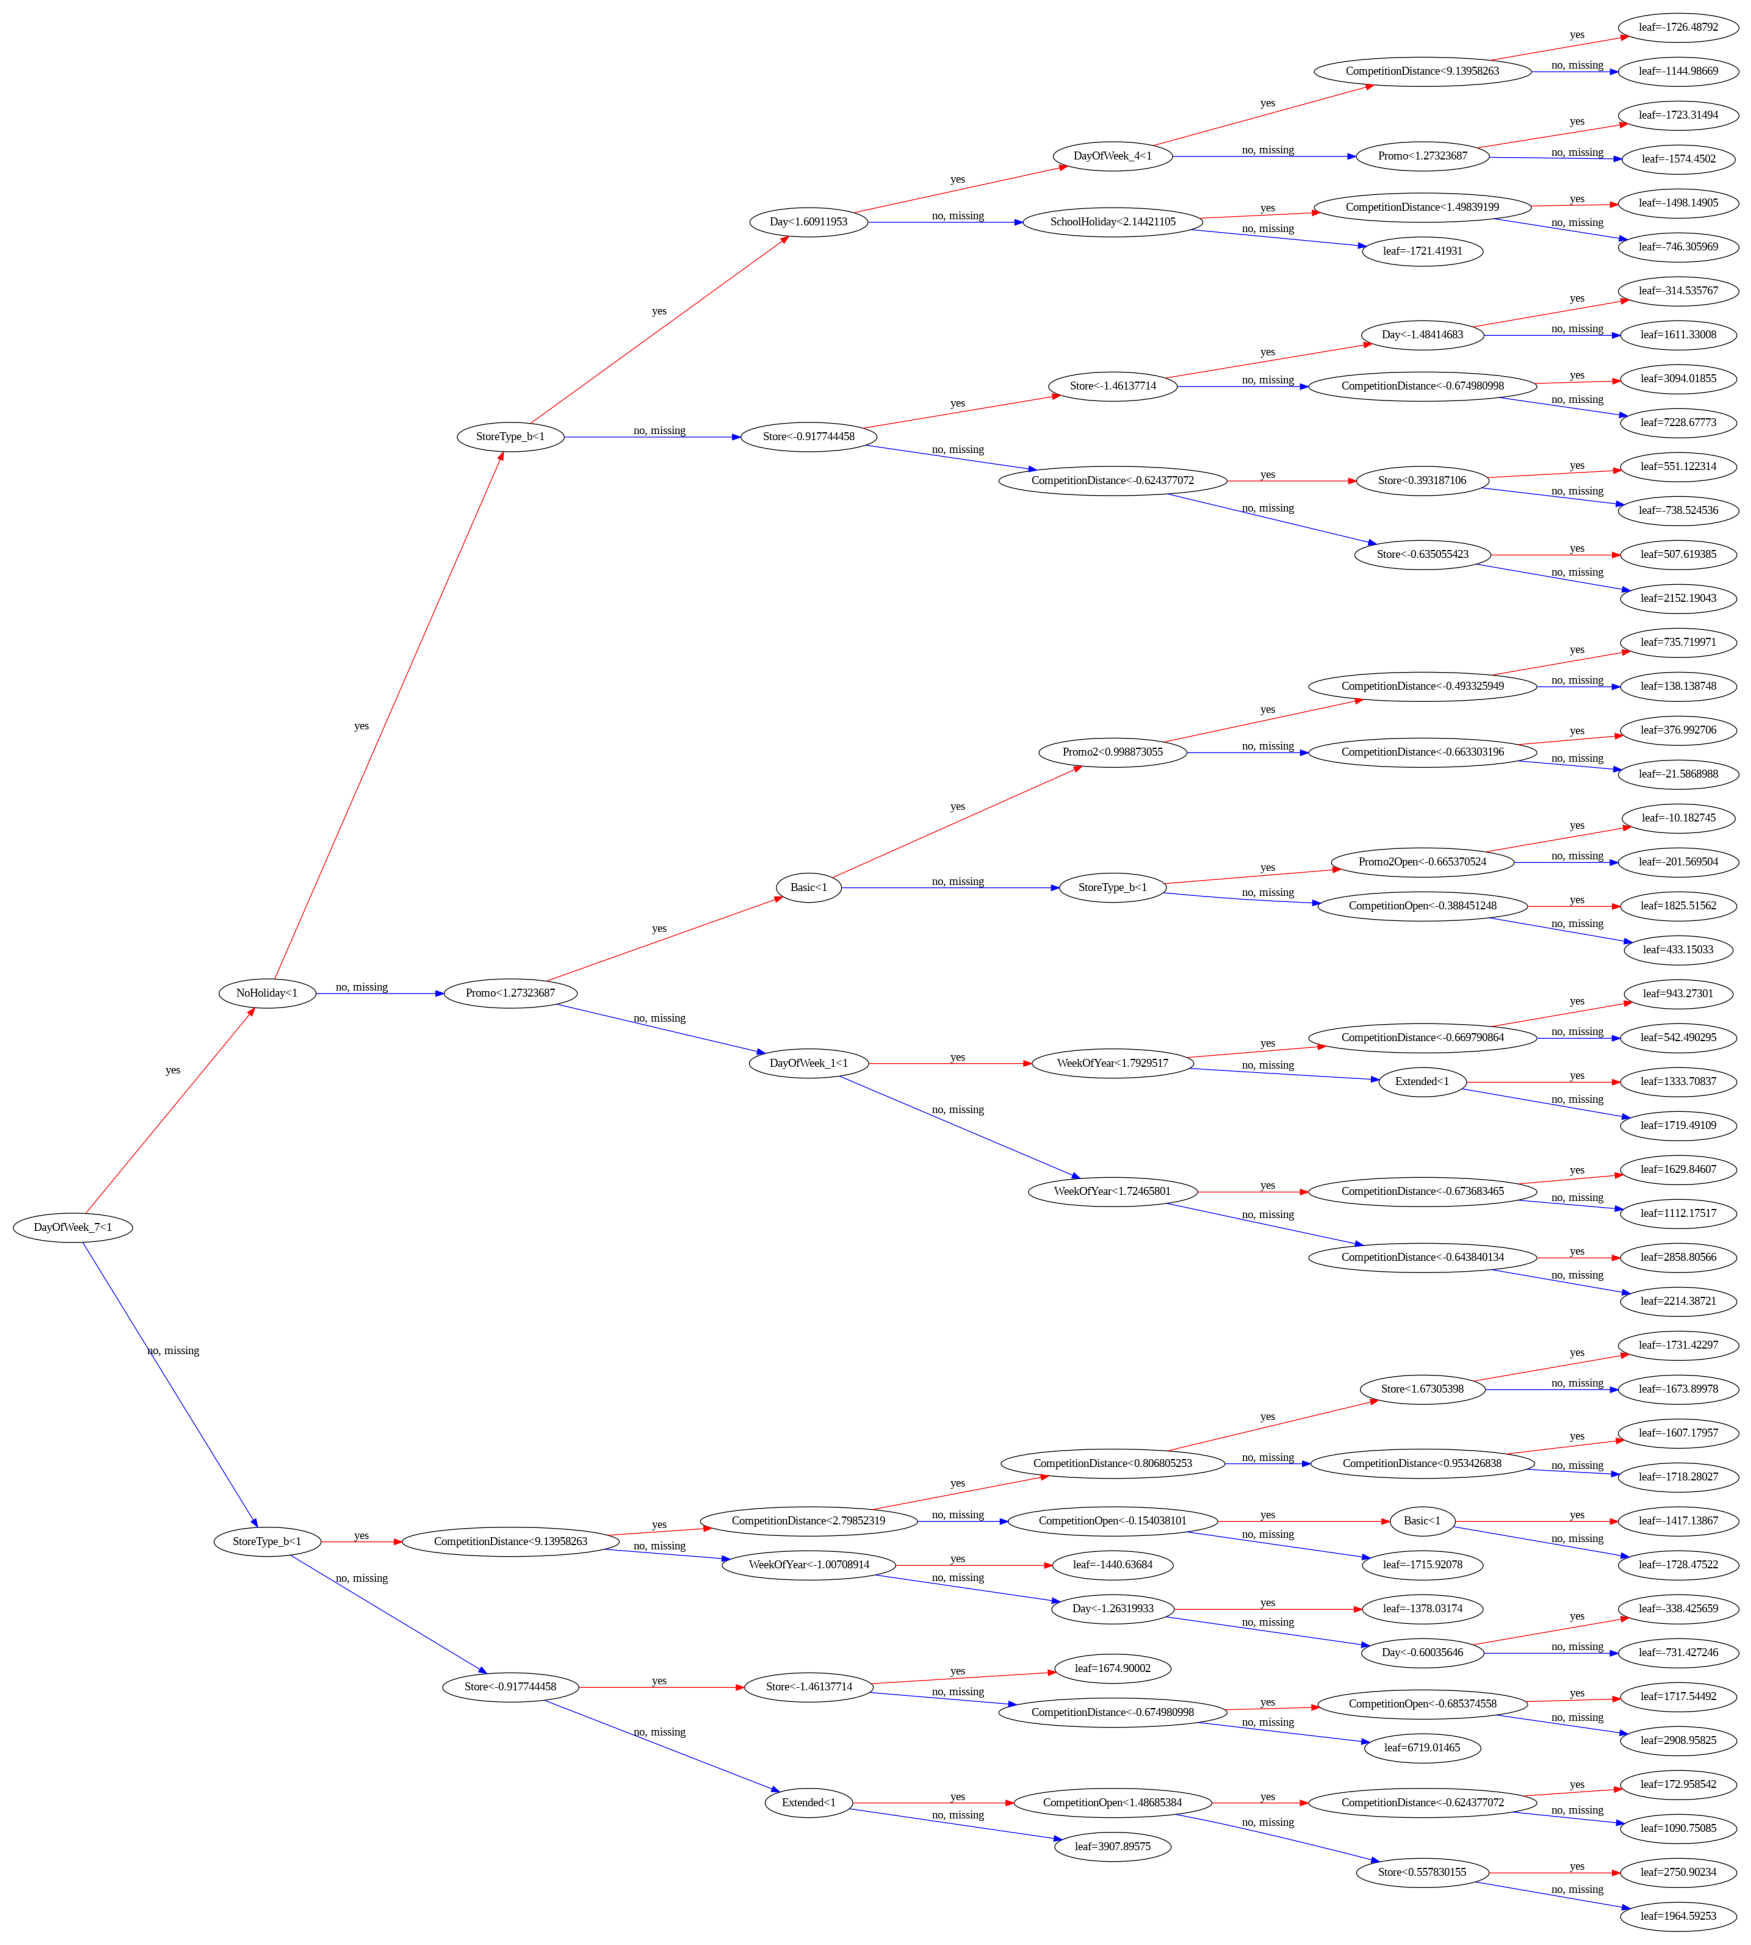

In [132]:
from xgboost import plot_tree
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 35,25

plot_tree(xgb_model, rankdir= 'LR');

In [125]:
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

In [126]:
feature_importance_df.head(10)

feature  importance
17          DayOfWeek_7    0.228044
18            NoHoliday    0.169205
23          StoreType_b    0.134516
1                 Promo    0.084346
11          DayOfWeek_1    0.058728
26                Basic    0.034592
5                Promo2    0.031604
25          StoreType_d    0.028040
10           WeekOfYear    0.023293
3   CompetitionDistance    0.022876

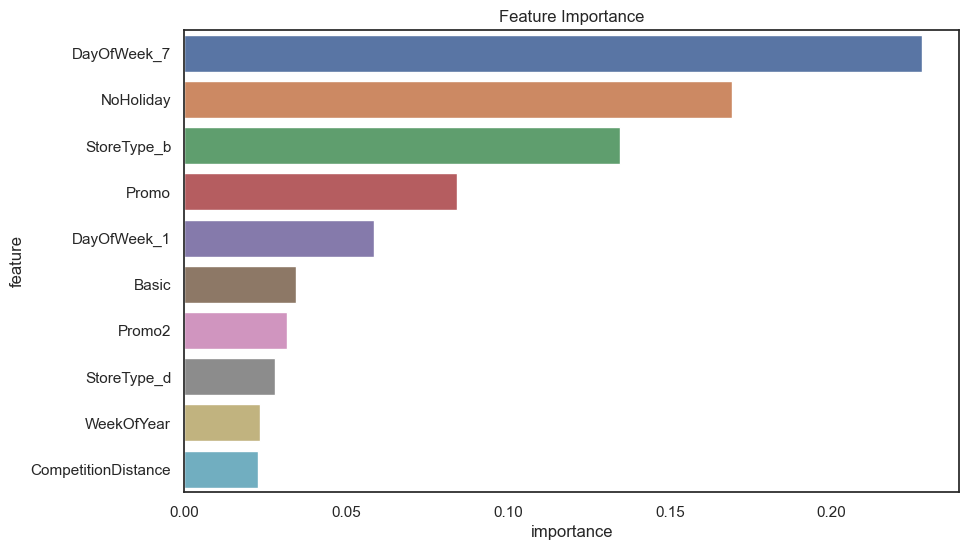

In [127]:
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=feature_importance_df.head(10), x='importance', y='feature');

In [128]:
model = XGBRegressor(n_jobs=-1,n_estimators=1000,learning_rate=0.2,
                     max_depth=10,colsample_bytree=0.7,booster="gbtree")

In [129]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=-1,
             num_parallel_tree=None, random_state=None, ...)

In [130]:
train_preds = model.predict(X_test)

In [131]:
rmse = sqrt(mean_squared_error(y_test,train_preds))

In [132]:
rmse

692.908393393299

In [133]:
rmpse = rmse/np.mean(y_test)*100
rmpse

12.008018722089176

#Predictions on Unseen data

In [134]:
pred_unseen = xgb_model.predict(X_test_unseen)

In [135]:
pred_unseen

array([ 5123.993 ,  7432.8594,  9704.537 , ...,  6174.43  , 21567.312 ,
        7125.4653], dtype=float32)

In [137]:
test['Sales']=pred_unseen

<Axes: xlabel='Date', ylabel='Sales'>

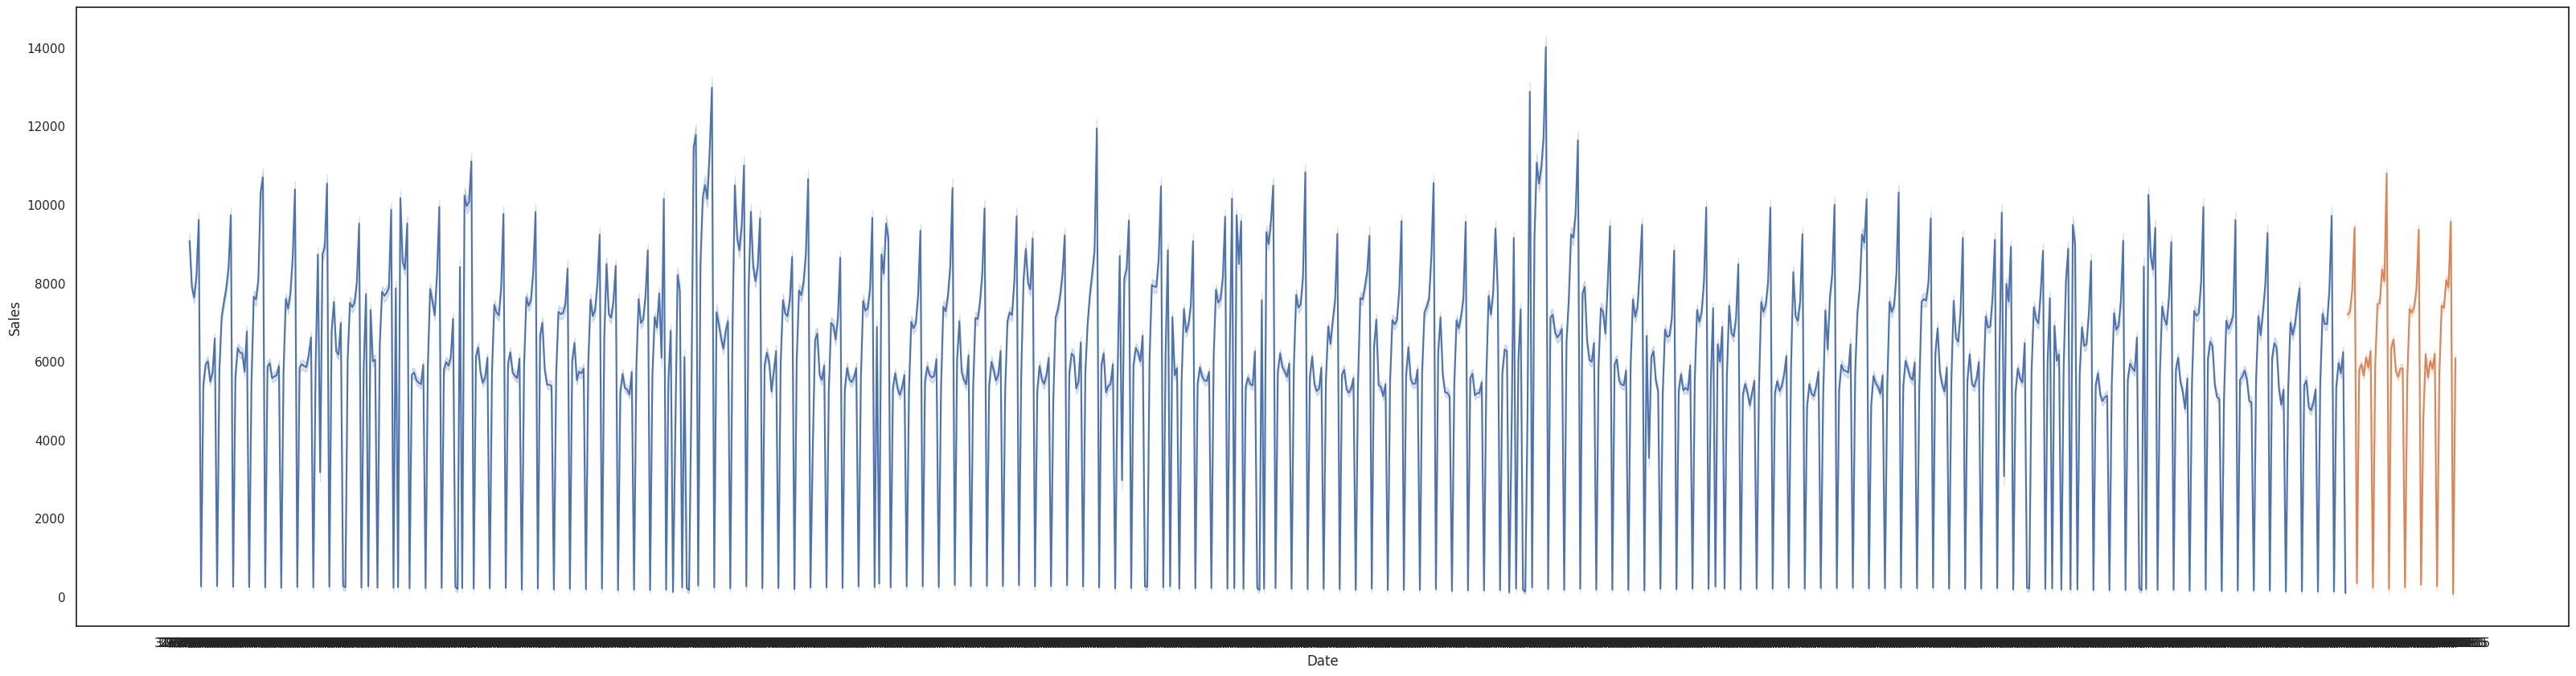

In [271]:
plt.figure(figsize=(40,10))
sns.lineplot(data=train,x=train['Date'],y=train['Sales'])
sns.lineplot(data=test,x=test['Date'],y=test['Sales'])


Text(0, 0.5, 'Density')

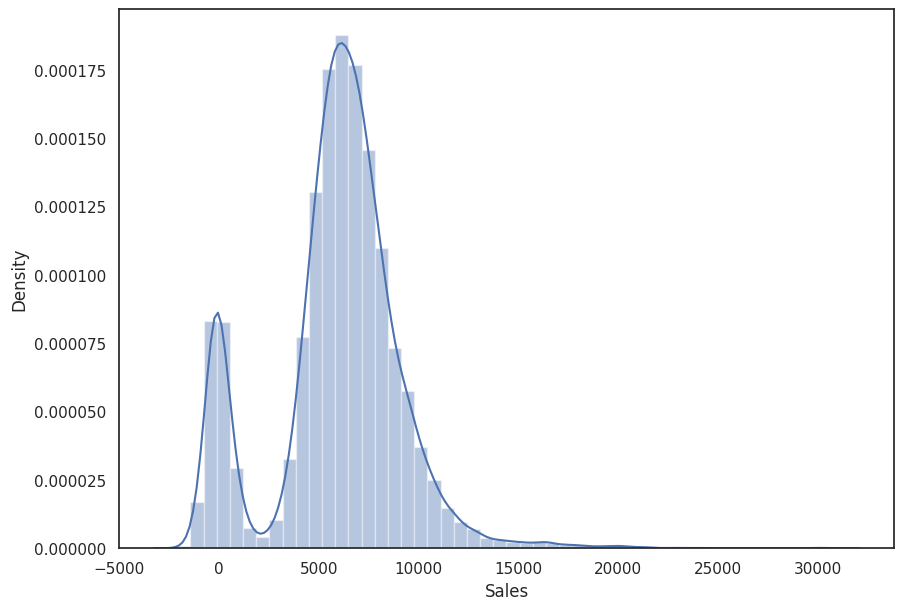

In [141]:
plt.figure(figsize = (10,7))
sns.distplot(test['Sales'])
plt.xlabel('Sales')
plt.ylabel('Density')

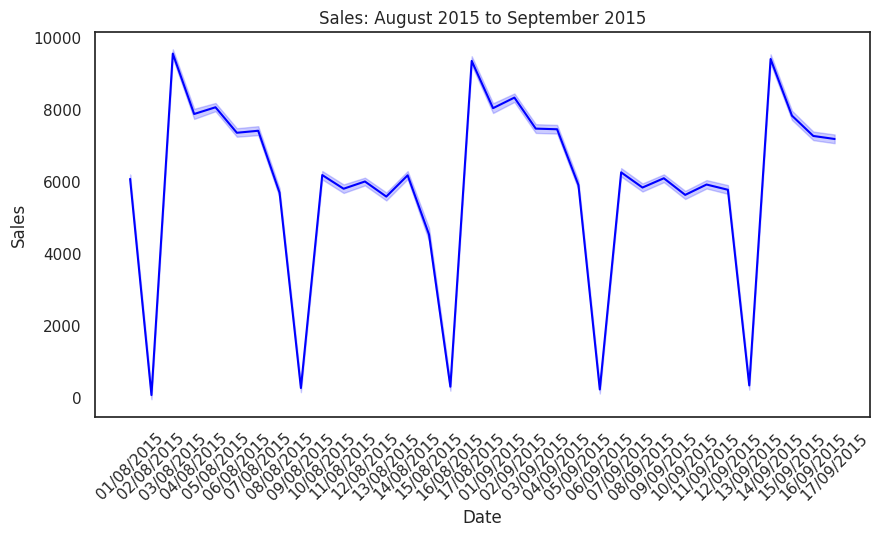

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter test_df_v for dates from August 2015 to September 2015
filtered_test_df_v = test[(test['Date'] >= '01/08/2015') & (test['Date'] <= '17/09/2015')]

# Reverse the order of the DataFrame
filtered_test_df_v = filtered_test_df_v[::-1]

plt.figure(figsize=(10, 5))
sns.lineplot(data=filtered_test_df_v, x='Date', y='Sales', color='blue')

# Set x-axis label and title
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales: August 2015 to September 2015')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

#Grid Search

In [142]:
xgb_model2 = XGBRegressor()

# Define the parameter grid to search
param_grid = {
    'n_estimators': [1000],
    'learning_rate': [0.1, 0.2, 0.3],
    'max_depth': [10, 15],
    'colsample_bytree': [0.5, 0.7, 0.9],
    'booster': ['gbtree']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model2, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and corresponding score
print("Best Parameters: ", grid_search.best_params_)
print("Best Negative Mean Squared Error: ", grid_search.best_score_)

y_pred2 = best_xgb_model.predict(X_test)
ypred2

Best Parameters:  {'booster': 'gbtree', 'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 1000}
Best Negative Mean Squared Error:  -477705.87625908386


NameError: name 'best_xgb_model' is not defined

In [143]:
best_xgb_model = grid_search.best_estimator_

In [147]:
y_pred2 = best_xgb_model.predict(X_test)

In [149]:
mse = mean_squared_error(y_test,y_pred2)
mse

480342.8477177378

In [150]:
rmse = sqrt(mean_squared_error(y_test,y_pred2))
rmse

693.0677078884413

#RandomForestRegressor

In [136]:
test_model = RandomForestRegressor(n_estimators=100, n_jobs=-1)

In [137]:
test_model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [138]:
train_preds = test_model.predict(X_test)

In [139]:
rmse = sqrt(mean_squared_error(y_test,train_preds))

In [140]:
rmse

925.6250843538509

In [168]:
rf_model = RandomForestRegressor(n_jobs= -1)